In [1]:
# from lstmstock import *
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
#import pandas_datareader.data as web
import h5py
from keras import backend as K
import quandl

Using TensorFlow backend.


1. Load the Data

In [2]:
# Load the data
top10_data = pd.read_csv("data/return_data_top10.csv")

# Equalize the data
min_date = pd.to_datetime('2013-10-1')
top10_data = top10_data[top10_data.Date >= '2013-10-1']

In [ ]:
tickers = top10_data.Ticker.unique()
for ticker in tickers:
    print(ticker)
    print(top10_data[top10_data.Ticker == ticker].Date.min())
    print(top10_data[top10_data.Ticker == ticker].Date.max())

In [3]:
df = pd.pivot_table(data=top10_data, columns=["Date"], index=["Ticker"], values="forward_return")
df

Date,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,...,2017-09-15,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,2017-09-25,2017-09-26,2017-09-27,2017-09-28
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.006482,0.006550,0.005322,0.004881,0.006757,0.008702,0.024508,-0.002867,0.009796,0.013239,...,-0.007568,0.000378,-0.016758,-0.017172,-0.009779,-0.008822,0.017204,0.007118,-0.006160,0.005480
BRK_B,0.008447,0.001641,-0.011810,0.017971,0.001971,0.000428,-0.000684,0.005133,-0.009192,0.003694,...,0.008783,0.008486,0.004426,-0.003590,-0.007098,0.003629,-0.003616,0.007753,-0.000327,0.000600
FB,0.001223,0.008145,-0.000202,0.033030,0.021023,0.038498,-0.006824,-0.021820,-0.014713,0.010501,...,-0.009150,0.014764,-0.002029,-0.006157,-0.003331,-0.044975,0.008227,0.021131,0.006262,0.012327
GE,0.006186,-0.000820,-0.007793,0.007028,0.013136,0.035251,0.023092,-0.004591,-0.012298,0.009339,...,0.022148,-0.010630,0.004959,0.017681,0.004848,0.009650,-0.007168,-0.022463,-0.005334,-0.002475
JNJ,0.019025,0.003913,0.001448,0.013121,0.009439,-0.003697,-0.004693,0.012719,-0.002815,0.002714,...,0.006917,-0.001182,-0.014791,-0.011034,-0.002732,-0.001674,-0.001753,-0.009088,-0.002158,0.004171
MSFT,0.010960,0.009376,0.001161,0.004349,0.008083,0.001145,0.000858,-0.011718,-0.023713,-0.001185,...,-0.001992,0.003725,-0.006628,-0.009741,0.002695,-0.015455,0.000000,0.008054,0.000271,0.008393
PG,0.007575,0.003313,-0.014478,0.017287,0.013786,-0.000126,-0.005541,0.017855,0.006594,-0.003708,...,-0.001287,0.010950,0.002442,-0.018644,-0.004318,0.005204,-0.000755,-0.019212,0.000220,0.000990
T,0.001464,-0.008187,-0.006191,0.014536,0.007018,0.004936,0.017625,0.000284,0.001391,-0.018396,...,0.008625,0.021112,0.005758,-0.005464,0.009681,0.013734,-0.010225,0.001291,0.006964,0.003330
WFC,-0.000241,0.007724,-0.005030,0.016129,0.011135,0.000000,-0.001406,0.007508,-0.004192,-0.001637,...,0.020325,0.012332,0.007309,0.005767,0.003515,-0.004055,-0.004257,0.007621,0.000738,0.016590


2. Build a Simple Auto-Encoder

In [4]:
model = Sequential()

model.add(LSTM(input_shape=(500,10), output_dim=4, return_sequences=True, unroll=True))
model.add(Dropout(0.2))
model.add(LSTM(output_dim=10, return_sequences=True))

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

c:\users\daniel\anaconda2\envs\dlworks\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=4, input_shape=(500, 10), return_sequences=True, unroll=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\daniel\anaconda2\envs\dlworks\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=10, return_sequences=True)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 500, 4)            240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 4)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 10)           600       
Total params: 840
Trainable params: 840
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

x_train = df.values[0:, :500].T.reshape((1, 500, 10))
y_train = df.values[0:, :500].T.reshape((1, 500, 10))

wt_dir = "./weights/"
model_name = 'model_best'
early_stopping =EarlyStopping(monitor='val_acc', patience=4000)
bst_model_path = wt_dir + model_name + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, monitor='val_acc', save_best_only=True, save_weights_only=True)


model.fit(x_train,
          y_train,
          batch_size=1,
          epochs=5000,
          validation_data=(x_train, y_train),
          verbose=1,
          callbacks=[early_stopping, model_checkpoint])

Train on 1 samples, validate on 1 samples
Epoch 1/5000
1/1 [==============================] - 0s 448ms/step - loss: 1.6163e-04 - acc: 0.1580 - val_loss: 1.6168e-04 - val_acc: 0.1780
Epoch 2/5000
1/1 [==============================] - 0s 426ms/step - loss: 1.6202e-04 - acc: 0.1700 - val_loss: 1.6171e-04 - val_acc: 0.1680
Epoch 3/5000
1/1 [==============================] - 0s 428ms/step - loss: 1.6147e-04 - acc: 0.1760 - val_loss: 1.6171e-04 - val_acc: 0.1620
Epoch 4/5000
1/1 [==============================] - 0s 425ms/step - loss: 1.6185e-04 - acc: 0.1660 - val_loss: 1.6161e-04 - val_acc: 0.1540
Epoch 5/5000
1/1 [==============================] - 0s 421ms/step - loss: 1.6170e-04 - acc: 0.1480 - val_loss: 1.6151e-04 - val_acc: 0.1540
Epoch 6/5000
1/1 [==============================] - 0s 425ms/step - loss: 1.6160e-04 - acc: 0.1520 - val_loss: 1.6141e-04 - val_acc: 0.1320
Epoch 7/5000
1/1 [==============================] - 0s 422ms/step - loss: 1.6155e-04 - acc: 0.1320 - val_loss: 1.6135e

Epoch 59/5000
1/1 [==============================] - 0s 457ms/step - loss: 1.5892e-04 - acc: 0.1980 - val_loss: 1.5892e-04 - val_acc: 0.1980
Epoch 60/5000
1/1 [==============================] - 0s 454ms/step - loss: 1.5903e-04 - acc: 0.1960 - val_loss: 1.5889e-04 - val_acc: 0.2000
Epoch 61/5000
1/1 [==============================] - 0s 457ms/step - loss: 1.5900e-04 - acc: 0.1940 - val_loss: 1.5886e-04 - val_acc: 0.2080
Epoch 62/5000
1/1 [==============================] - 0s 446ms/step - loss: 1.5888e-04 - acc: 0.1960 - val_loss: 1.5883e-04 - val_acc: 0.2080
Epoch 63/5000
1/1 [==============================] - 0s 447ms/step - loss: 1.5888e-04 - acc: 0.2060 - val_loss: 1.5879e-04 - val_acc: 0.2060
Epoch 64/5000
1/1 [==============================] - 0s 450ms/step - loss: 1.5903e-04 - acc: 0.1940 - val_loss: 1.5876e-04 - val_acc: 0.1960
Epoch 65/5000
1/1 [==============================] - 0s 441ms/step - loss: 1.5891e-04 - acc: 0.1900 - val_loss: 1.5873e-04 - val_acc: 0.1900
Epoch 66/5000

Epoch 117/5000
1/1 [==============================] - 0s 484ms/step - loss: 1.5740e-04 - acc: 0.2140 - val_loss: 1.5731e-04 - val_acc: 0.2080
Epoch 118/5000
1/1 [==============================] - 1s 509ms/step - loss: 1.5716e-04 - acc: 0.2080 - val_loss: 1.5728e-04 - val_acc: 0.2060
Epoch 119/5000
1/1 [==============================] - 0s 491ms/step - loss: 1.5723e-04 - acc: 0.2200 - val_loss: 1.5725e-04 - val_acc: 0.1980
Epoch 120/5000
1/1 [==============================] - 0s 485ms/step - loss: 1.5725e-04 - acc: 0.2120 - val_loss: 1.5722e-04 - val_acc: 0.1960
Epoch 121/5000
1/1 [==============================] - 0s 485ms/step - loss: 1.5726e-04 - acc: 0.2080 - val_loss: 1.5720e-04 - val_acc: 0.1920
Epoch 122/5000
1/1 [==============================] - 0s 490ms/step - loss: 1.5726e-04 - acc: 0.2000 - val_loss: 1.5717e-04 - val_acc: 0.2020
Epoch 123/5000
1/1 [==============================] - 0s 485ms/step - loss: 1.5725e-04 - acc: 0.1980 - val_loss: 1.5714e-04 - val_acc: 0.2060
Epoch 

Epoch 175/5000
1/1 [==============================] - 0s 488ms/step - loss: 1.5529e-04 - acc: 0.2080 - val_loss: 1.5532e-04 - val_acc: 0.2060
Epoch 176/5000
1/1 [==============================] - 0s 484ms/step - loss: 1.5544e-04 - acc: 0.2080 - val_loss: 1.5527e-04 - val_acc: 0.2120
Epoch 177/5000
1/1 [==============================] - 0s 493ms/step - loss: 1.5552e-04 - acc: 0.2340 - val_loss: 1.5523e-04 - val_acc: 0.2120
Epoch 178/5000
1/1 [==============================] - 0s 493ms/step - loss: 1.5521e-04 - acc: 0.2060 - val_loss: 1.5518e-04 - val_acc: 0.2080
Epoch 179/5000
1/1 [==============================] - 0s 479ms/step - loss: 1.5531e-04 - acc: 0.1940 - val_loss: 1.5513e-04 - val_acc: 0.2080
Epoch 180/5000
1/1 [==============================] - 0s 485ms/step - loss: 1.5519e-04 - acc: 0.2220 - val_loss: 1.5508e-04 - val_acc: 0.2100
Epoch 181/5000
1/1 [==============================] - 0s 482ms/step - loss: 1.5507e-04 - acc: 0.2100 - val_loss: 1.5503e-04 - val_acc: 0.2080
Epoch 

Epoch 233/5000
1/1 [==============================] - 0s 496ms/step - loss: 1.5072e-04 - acc: 0.2040 - val_loss: 1.5076e-04 - val_acc: 0.2120
Epoch 234/5000
1/1 [==============================] - 0s 410ms/step - loss: 1.5088e-04 - acc: 0.2140 - val_loss: 1.5063e-04 - val_acc: 0.2060
Epoch 235/5000
1/1 [==============================] - 0s 454ms/step - loss: 1.5104e-04 - acc: 0.2320 - val_loss: 1.5050e-04 - val_acc: 0.2100
Epoch 236/5000
1/1 [==============================] - 0s 408ms/step - loss: 1.5105e-04 - acc: 0.2000 - val_loss: 1.5036e-04 - val_acc: 0.2120
Epoch 237/5000
1/1 [==============================] - 0s 416ms/step - loss: 1.5055e-04 - acc: 0.2020 - val_loss: 1.5023e-04 - val_acc: 0.2120
Epoch 238/5000
1/1 [==============================] - 0s 413ms/step - loss: 1.5091e-04 - acc: 0.2140 - val_loss: 1.5009e-04 - val_acc: 0.2100
Epoch 239/5000
1/1 [==============================] - 0s 410ms/step - loss: 1.5021e-04 - acc: 0.2100 - val_loss: 1.4995e-04 - val_acc: 0.2100
Epoch 

Epoch 291/5000
1/1 [==============================] - 1s 565ms/step - loss: 1.3953e-04 - acc: 0.2280 - val_loss: 1.3834e-04 - val_acc: 0.2160
Epoch 292/5000
1/1 [==============================] - 1s 529ms/step - loss: 1.3811e-04 - acc: 0.2180 - val_loss: 1.3807e-04 - val_acc: 0.2000
Epoch 293/5000
1/1 [==============================] - 1s 571ms/step - loss: 1.3839e-04 - acc: 0.1880 - val_loss: 1.3770e-04 - val_acc: 0.2040
Epoch 294/5000
1/1 [==============================] - 1s 581ms/step - loss: 1.3853e-04 - acc: 0.1880 - val_loss: 1.3741e-04 - val_acc: 0.2220
Epoch 295/5000
1/1 [==============================] - 1s 542ms/step - loss: 1.3740e-04 - acc: 0.1960 - val_loss: 1.3704e-04 - val_acc: 0.2160
Epoch 296/5000
1/1 [==============================] - 1s 507ms/step - loss: 1.3827e-04 - acc: 0.2000 - val_loss: 1.3670e-04 - val_acc: 0.2180
Epoch 297/5000
1/1 [==============================] - 1s 500ms/step - loss: 1.3847e-04 - acc: 0.2220 - val_loss: 1.3637e-04 - val_acc: 0.2100
Epoch 

Epoch 349/5000
1/1 [==============================] - 1s 511ms/step - loss: 1.1873e-04 - acc: 0.2220 - val_loss: 1.1436e-04 - val_acc: 0.2260
Epoch 350/5000
1/1 [==============================] - 1s 520ms/step - loss: 1.1490e-04 - acc: 0.2240 - val_loss: 1.1394e-04 - val_acc: 0.2160
Epoch 351/5000
1/1 [==============================] - 1s 508ms/step - loss: 1.1472e-04 - acc: 0.1960 - val_loss: 1.1343e-04 - val_acc: 0.2320
Epoch 352/5000
1/1 [==============================] - 1s 507ms/step - loss: 1.1437e-04 - acc: 0.2160 - val_loss: 1.1304e-04 - val_acc: 0.2420
Epoch 353/5000
1/1 [==============================] - 0s 488ms/step - loss: 1.1526e-04 - acc: 0.2360 - val_loss: 1.1252e-04 - val_acc: 0.2260
Epoch 354/5000
1/1 [==============================] - 0s 499ms/step - loss: 1.1512e-04 - acc: 0.2320 - val_loss: 1.1211e-04 - val_acc: 0.2260
Epoch 355/5000
1/1 [==============================] - 1s 505ms/step - loss: 1.1414e-04 - acc: 0.2140 - val_loss: 1.1164e-04 - val_acc: 0.2480
Epoch 

Epoch 407/5000
1/1 [==============================] - 1s 564ms/step - loss: 9.8074e-05 - acc: 0.2480 - val_loss: 9.3948e-05 - val_acc: 0.2360
Epoch 408/5000
1/1 [==============================] - 1s 532ms/step - loss: 9.8689e-05 - acc: 0.1960 - val_loss: 9.3708e-05 - val_acc: 0.2380
Epoch 409/5000
1/1 [==============================] - 0s 497ms/step - loss: 9.7537e-05 - acc: 0.2300 - val_loss: 9.3492e-05 - val_acc: 0.2660
Epoch 410/5000
1/1 [==============================] - 0s 499ms/step - loss: 9.7867e-05 - acc: 0.2000 - val_loss: 9.3258e-05 - val_acc: 0.2600
Epoch 411/5000
1/1 [==============================] - 1s 514ms/step - loss: 9.6122e-05 - acc: 0.2220 - val_loss: 9.3041e-05 - val_acc: 0.2360
Epoch 412/5000
1/1 [==============================] - 1s 511ms/step - loss: 9.5481e-05 - acc: 0.2040 - val_loss: 9.2834e-05 - val_acc: 0.2400
Epoch 413/5000
1/1 [==============================] - 1s 508ms/step - loss: 9.7160e-05 - acc: 0.2300 - val_loss: 9.2594e-05 - val_acc: 0.2560
Epoch 

Epoch 465/5000
1/1 [==============================] - 0s 492ms/step - loss: 8.8817e-05 - acc: 0.2560 - val_loss: 8.3904e-05 - val_acc: 0.2780
Epoch 466/5000
1/1 [==============================] - 0s 489ms/step - loss: 9.0532e-05 - acc: 0.2480 - val_loss: 8.3768e-05 - val_acc: 0.2860
Epoch 467/5000
1/1 [==============================] - 1s 519ms/step - loss: 8.8891e-05 - acc: 0.2720 - val_loss: 8.3623e-05 - val_acc: 0.2840
Epoch 468/5000
1/1 [==============================] - 1s 514ms/step - loss: 8.7382e-05 - acc: 0.2760 - val_loss: 8.3482e-05 - val_acc: 0.2820
Epoch 469/5000
1/1 [==============================] - 1s 501ms/step - loss: 9.0261e-05 - acc: 0.2680 - val_loss: 8.3345e-05 - val_acc: 0.2860
Epoch 470/5000
1/1 [==============================] - 0s 499ms/step - loss: 8.6669e-05 - acc: 0.2660 - val_loss: 8.3191e-05 - val_acc: 0.2780
Epoch 471/5000
1/1 [==============================] - 1s 500ms/step - loss: 8.8929e-05 - acc: 0.2720 - val_loss: 8.3070e-05 - val_acc: 0.2780
Epoch 

Epoch 523/5000
1/1 [==============================] - 0s 490ms/step - loss: 8.2272e-05 - acc: 0.2920 - val_loss: 7.6628e-05 - val_acc: 0.3080
Epoch 524/5000
1/1 [==============================] - 1s 504ms/step - loss: 8.2585e-05 - acc: 0.2920 - val_loss: 7.6507e-05 - val_acc: 0.3060
Epoch 525/5000
1/1 [==============================] - 0s 494ms/step - loss: 8.3191e-05 - acc: 0.2740 - val_loss: 7.6407e-05 - val_acc: 0.3120
Epoch 526/5000
1/1 [==============================] - 1s 503ms/step - loss: 8.1954e-05 - acc: 0.2960 - val_loss: 7.6291e-05 - val_acc: 0.3100
Epoch 527/5000
1/1 [==============================] - 0s 499ms/step - loss: 8.1554e-05 - acc: 0.2960 - val_loss: 7.6178e-05 - val_acc: 0.3080
Epoch 528/5000
1/1 [==============================] - 0s 497ms/step - loss: 8.0720e-05 - acc: 0.2980 - val_loss: 7.6075e-05 - val_acc: 0.3100
Epoch 529/5000
1/1 [==============================] - 0s 499ms/step - loss: 8.1662e-05 - acc: 0.2720 - val_loss: 7.5970e-05 - val_acc: 0.3100
Epoch 

Epoch 581/5000
1/1 [==============================] - 0s 499ms/step - loss: 7.8081e-05 - acc: 0.3180 - val_loss: 7.0494e-05 - val_acc: 0.3400
Epoch 582/5000
1/1 [==============================] - 1s 505ms/step - loss: 7.8010e-05 - acc: 0.2880 - val_loss: 7.0388e-05 - val_acc: 0.3300
Epoch 583/5000
1/1 [==============================] - 0s 492ms/step - loss: 7.6439e-05 - acc: 0.2960 - val_loss: 7.0297e-05 - val_acc: 0.3320
Epoch 584/5000
1/1 [==============================] - 1s 592ms/step - loss: 7.7166e-05 - acc: 0.3000 - val_loss: 7.0189e-05 - val_acc: 0.3360
Epoch 585/5000
1/1 [==============================] - 1s 521ms/step - loss: 7.6120e-05 - acc: 0.2820 - val_loss: 7.0104e-05 - val_acc: 0.3380
Epoch 586/5000
1/1 [==============================] - 1s 554ms/step - loss: 7.7903e-05 - acc: 0.3060 - val_loss: 6.9988e-05 - val_acc: 0.3340
Epoch 587/5000
1/1 [==============================] - 1s 849ms/step - loss: 7.8457e-05 - acc: 0.2900 - val_loss: 6.9919e-05 - val_acc: 0.3340
Epoch 

Epoch 639/5000
1/1 [==============================] - 0s 499ms/step - loss: 7.3424e-05 - acc: 0.3180 - val_loss: 6.5099e-05 - val_acc: 0.3360
Epoch 640/5000
1/1 [==============================] - 1s 503ms/step - loss: 7.2800e-05 - acc: 0.3240 - val_loss: 6.5123e-05 - val_acc: 0.3380
Epoch 641/5000
1/1 [==============================] - 1s 503ms/step - loss: 7.5168e-05 - acc: 0.3120 - val_loss: 6.4877e-05 - val_acc: 0.3400
Epoch 642/5000
1/1 [==============================] - 0s 493ms/step - loss: 7.3591e-05 - acc: 0.3240 - val_loss: 6.4839e-05 - val_acc: 0.3560
Epoch 643/5000
1/1 [==============================] - 0s 496ms/step - loss: 7.3923e-05 - acc: 0.3080 - val_loss: 6.4774e-05 - val_acc: 0.3560
Epoch 644/5000
1/1 [==============================] - 1s 501ms/step - loss: 7.4415e-05 - acc: 0.3180 - val_loss: 6.4591e-05 - val_acc: 0.3460
Epoch 645/5000
1/1 [==============================] - 0s 497ms/step - loss: 7.1268e-05 - acc: 0.3260 - val_loss: 6.4582e-05 - val_acc: 0.3340
Epoch 

Epoch 697/5000
1/1 [==============================] - 1s 501ms/step - loss: 7.0947e-05 - acc: 0.3240 - val_loss: 6.0340e-05 - val_acc: 0.3620
Epoch 698/5000
1/1 [==============================] - 1s 543ms/step - loss: 6.8428e-05 - acc: 0.3280 - val_loss: 6.0276e-05 - val_acc: 0.3620
Epoch 699/5000
1/1 [==============================] - 1s 510ms/step - loss: 6.9398e-05 - acc: 0.3380 - val_loss: 6.0201e-05 - val_acc: 0.3600
Epoch 700/5000
1/1 [==============================] - 1s 530ms/step - loss: 6.9598e-05 - acc: 0.3100 - val_loss: 6.0129e-05 - val_acc: 0.3580
Epoch 701/5000
1/1 [==============================] - 1s 532ms/step - loss: 6.7344e-05 - acc: 0.3260 - val_loss: 6.0095e-05 - val_acc: 0.3560
Epoch 702/5000
1/1 [==============================] - 1s 525ms/step - loss: 6.8459e-05 - acc: 0.3040 - val_loss: 6.0036e-05 - val_acc: 0.3620
Epoch 703/5000
1/1 [==============================] - 1s 578ms/step - loss: 6.9076e-05 - acc: 0.3260 - val_loss: 5.9944e-05 - val_acc: 0.3660
Epoch 

Epoch 755/5000
1/1 [==============================] - 1s 575ms/step - loss: 6.5782e-05 - acc: 0.3320 - val_loss: 5.6745e-05 - val_acc: 0.3640
Epoch 756/5000
1/1 [==============================] - 1s 503ms/step - loss: 6.5449e-05 - acc: 0.3360 - val_loss: 5.6658e-05 - val_acc: 0.3720
Epoch 757/5000
1/1 [==============================] - 1s 530ms/step - loss: 6.4281e-05 - acc: 0.3440 - val_loss: 5.6678e-05 - val_acc: 0.3720
Epoch 758/5000
1/1 [==============================] - 1s 543ms/step - loss: 6.6605e-05 - acc: 0.3200 - val_loss: 5.6578e-05 - val_acc: 0.3720
Epoch 759/5000
1/1 [==============================] - 1s 636ms/step - loss: 6.3720e-05 - acc: 0.3380 - val_loss: 5.6538e-05 - val_acc: 0.3620
Epoch 760/5000
1/1 [==============================] - 1s 504ms/step - loss: 6.4249e-05 - acc: 0.3520 - val_loss: 5.6520e-05 - val_acc: 0.3680
Epoch 761/5000
1/1 [==============================] - 0s 490ms/step - loss: 6.7808e-05 - acc: 0.3440 - val_loss: 5.6419e-05 - val_acc: 0.3680
Epoch 

Epoch 813/5000
1/1 [==============================] - 1s 501ms/step - loss: 6.3147e-05 - acc: 0.3720 - val_loss: 5.4008e-05 - val_acc: 0.3840
Epoch 814/5000
1/1 [==============================] - 1s 505ms/step - loss: 6.4727e-05 - acc: 0.3500 - val_loss: 5.3987e-05 - val_acc: 0.3800
Epoch 815/5000
1/1 [==============================] - 0s 499ms/step - loss: 6.6058e-05 - acc: 0.3460 - val_loss: 5.4040e-05 - val_acc: 0.3700
Epoch 816/5000
1/1 [==============================] - 0s 497ms/step - loss: 6.5977e-05 - acc: 0.3420 - val_loss: 5.3913e-05 - val_acc: 0.3740
Epoch 817/5000
1/1 [==============================] - 0s 491ms/step - loss: 6.7065e-05 - acc: 0.3380 - val_loss: 5.3849e-05 - val_acc: 0.3800
Epoch 818/5000
1/1 [==============================] - 1s 502ms/step - loss: 6.9455e-05 - acc: 0.3560 - val_loss: 5.3928e-05 - val_acc: 0.3860
Epoch 819/5000
1/1 [==============================] - 1s 512ms/step - loss: 6.4297e-05 - acc: 0.3440 - val_loss: 5.3819e-05 - val_acc: 0.3920
Epoch 

Epoch 871/5000
1/1 [==============================] - 0s 497ms/step - loss: 6.4448e-05 - acc: 0.3560 - val_loss: 5.1868e-05 - val_acc: 0.3960
Epoch 872/5000
1/1 [==============================] - 0s 497ms/step - loss: 6.4176e-05 - acc: 0.3540 - val_loss: 5.1835e-05 - val_acc: 0.3900
Epoch 873/5000
1/1 [==============================] - 0s 492ms/step - loss: 6.3920e-05 - acc: 0.3380 - val_loss: 5.1783e-05 - val_acc: 0.3840
Epoch 874/5000
1/1 [==============================] - 0s 492ms/step - loss: 6.4916e-05 - acc: 0.3660 - val_loss: 5.1819e-05 - val_acc: 0.3840
Epoch 875/5000
1/1 [==============================] - 0s 487ms/step - loss: 6.1714e-05 - acc: 0.3700 - val_loss: 5.1770e-05 - val_acc: 0.3880
Epoch 876/5000
1/1 [==============================] - 0s 492ms/step - loss: 6.5011e-05 - acc: 0.3560 - val_loss: 5.1674e-05 - val_acc: 0.4020
Epoch 877/5000
1/1 [==============================] - 0s 497ms/step - loss: 6.2005e-05 - acc: 0.3600 - val_loss: 5.1695e-05 - val_acc: 0.3960
Epoch 

Epoch 929/5000
1/1 [==============================] - 0s 493ms/step - loss: 6.4018e-05 - acc: 0.3780 - val_loss: 4.9865e-05 - val_acc: 0.4040
Epoch 930/5000
1/1 [==============================] - 0s 499ms/step - loss: 6.0739e-05 - acc: 0.3700 - val_loss: 4.9809e-05 - val_acc: 0.4020
Epoch 931/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.9735e-05 - acc: 0.3500 - val_loss: 4.9793e-05 - val_acc: 0.3980
Epoch 932/5000
1/1 [==============================] - 0s 498ms/step - loss: 6.1515e-05 - acc: 0.3540 - val_loss: 4.9764e-05 - val_acc: 0.4000
Epoch 933/5000
1/1 [==============================] - 1s 503ms/step - loss: 6.1753e-05 - acc: 0.3740 - val_loss: 4.9729e-05 - val_acc: 0.3980
Epoch 934/5000
1/1 [==============================] - 1s 522ms/step - loss: 6.4452e-05 - acc: 0.3720 - val_loss: 4.9702e-05 - val_acc: 0.4080
Epoch 935/5000
1/1 [==============================] - 1s 529ms/step - loss: 6.0425e-05 - acc: 0.3780 - val_loss: 4.9659e-05 - val_acc: 0.4100
Epoch 

Epoch 987/5000
1/1 [==============================] - 1s 523ms/step - loss: 6.2359e-05 - acc: 0.3680 - val_loss: 4.7895e-05 - val_acc: 0.4100
Epoch 988/5000
1/1 [==============================] - 1s 526ms/step - loss: 6.1225e-05 - acc: 0.3560 - val_loss: 4.7906e-05 - val_acc: 0.4160
Epoch 989/5000
1/1 [==============================] - 1s 543ms/step - loss: 5.8861e-05 - acc: 0.3780 - val_loss: 4.7884e-05 - val_acc: 0.4240
Epoch 990/5000
1/1 [==============================] - 1s 535ms/step - loss: 5.9476e-05 - acc: 0.3780 - val_loss: 4.7808e-05 - val_acc: 0.4200
Epoch 991/5000
1/1 [==============================] - 1s 544ms/step - loss: 6.1550e-05 - acc: 0.3900 - val_loss: 4.7812e-05 - val_acc: 0.4180
Epoch 992/5000
1/1 [==============================] - 1s 530ms/step - loss: 5.7854e-05 - acc: 0.3780 - val_loss: 4.7810e-05 - val_acc: 0.4040
Epoch 993/5000
1/1 [==============================] - 1s 529ms/step - loss: 6.0013e-05 - acc: 0.3720 - val_loss: 4.7749e-05 - val_acc: 0.4020
Epoch 

Epoch 1045/5000
1/1 [==============================] - 1s 535ms/step - loss: 5.5191e-05 - acc: 0.4100 - val_loss: 4.5776e-05 - val_acc: 0.4200
Epoch 1046/5000
1/1 [==============================] - 1s 525ms/step - loss: 5.8163e-05 - acc: 0.4040 - val_loss: 4.5780e-05 - val_acc: 0.4180
Epoch 1047/5000
1/1 [==============================] - 1s 500ms/step - loss: 5.5772e-05 - acc: 0.4060 - val_loss: 4.5715e-05 - val_acc: 0.4320
Epoch 1048/5000
1/1 [==============================] - 0s 500ms/step - loss: 5.6532e-05 - acc: 0.4060 - val_loss: 4.5684e-05 - val_acc: 0.4460
Epoch 1049/5000
1/1 [==============================] - 0s 486ms/step - loss: 5.7260e-05 - acc: 0.3980 - val_loss: 4.5645e-05 - val_acc: 0.4460
Epoch 1050/5000
1/1 [==============================] - 0s 486ms/step - loss: 5.8817e-05 - acc: 0.4220 - val_loss: 4.5593e-05 - val_acc: 0.4280
Epoch 1051/5000
1/1 [==============================] - 0s 494ms/step - loss: 5.8822e-05 - acc: 0.4020 - val_loss: 4.5621e-05 - val_acc: 0.4240

Epoch 1103/5000
1/1 [==============================] - 1s 516ms/step - loss: 5.6491e-05 - acc: 0.4160 - val_loss: 4.3793e-05 - val_acc: 0.4340
Epoch 1104/5000
1/1 [==============================] - 1s 516ms/step - loss: 5.8680e-05 - acc: 0.3920 - val_loss: 4.3739e-05 - val_acc: 0.4340
Epoch 1105/5000
1/1 [==============================] - 1s 515ms/step - loss: 6.0352e-05 - acc: 0.4040 - val_loss: 4.3739e-05 - val_acc: 0.4580
Epoch 1106/5000
1/1 [==============================] - 0s 498ms/step - loss: 5.7460e-05 - acc: 0.4180 - val_loss: 4.3722e-05 - val_acc: 0.4620
Epoch 1107/5000
1/1 [==============================] - 1s 505ms/step - loss: 5.8375e-05 - acc: 0.4080 - val_loss: 4.3635e-05 - val_acc: 0.4440
Epoch 1108/5000
1/1 [==============================] - 1s 510ms/step - loss: 5.3610e-05 - acc: 0.4160 - val_loss: 4.3705e-05 - val_acc: 0.4440
Epoch 1109/5000
1/1 [==============================] - 1s 503ms/step - loss: 5.6181e-05 - acc: 0.4040 - val_loss: 4.3607e-05 - val_acc: 0.4400

Epoch 1161/5000
1/1 [==============================] - 0s 498ms/step - loss: 5.5170e-05 - acc: 0.4200 - val_loss: 4.2239e-05 - val_acc: 0.4600
Epoch 1162/5000
1/1 [==============================] - 0s 489ms/step - loss: 5.7853e-05 - acc: 0.4320 - val_loss: 4.2136e-05 - val_acc: 0.4700
Epoch 1163/5000
1/1 [==============================] - 0s 493ms/step - loss: 5.3976e-05 - acc: 0.4280 - val_loss: 4.2230e-05 - val_acc: 0.4740
Epoch 1164/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.5347e-05 - acc: 0.4140 - val_loss: 4.2099e-05 - val_acc: 0.4640
Epoch 1165/5000
1/1 [==============================] - 1s 503ms/step - loss: 5.7140e-05 - acc: 0.4140 - val_loss: 4.2057e-05 - val_acc: 0.4520
Epoch 1166/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.6176e-05 - acc: 0.4160 - val_loss: 4.2124e-05 - val_acc: 0.4540
Epoch 1167/5000
1/1 [==============================] - 0s 493ms/step - loss: 5.6360e-05 - acc: 0.4020 - val_loss: 4.1975e-05 - val_acc: 0.4580

Epoch 1219/5000
1/1 [==============================] - 1s 501ms/step - loss: 5.6496e-05 - acc: 0.4200 - val_loss: 4.0566e-05 - val_acc: 0.4800
Epoch 1220/5000
1/1 [==============================] - 1s 502ms/step - loss: 5.5299e-05 - acc: 0.4080 - val_loss: 4.0570e-05 - val_acc: 0.4800
Epoch 1221/5000
1/1 [==============================] - 0s 496ms/step - loss: 5.4729e-05 - acc: 0.4480 - val_loss: 4.0558e-05 - val_acc: 0.4700
Epoch 1222/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.7123e-05 - acc: 0.4340 - val_loss: 4.0524e-05 - val_acc: 0.4720
Epoch 1223/5000
1/1 [==============================] - 0s 491ms/step - loss: 6.0864e-05 - acc: 0.4040 - val_loss: 4.0480e-05 - val_acc: 0.4760
Epoch 1224/5000
1/1 [==============================] - 0s 490ms/step - loss: 5.7460e-05 - acc: 0.4160 - val_loss: 4.0456e-05 - val_acc: 0.4880
Epoch 1225/5000
1/1 [==============================] - 1s 519ms/step - loss: 5.6356e-05 - acc: 0.4420 - val_loss: 4.0475e-05 - val_acc: 0.4920

Epoch 1277/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.4964e-05 - acc: 0.4560 - val_loss: 3.9287e-05 - val_acc: 0.4960
Epoch 1278/5000
1/1 [==============================] - 0s 482ms/step - loss: 5.3017e-05 - acc: 0.4340 - val_loss: 3.9288e-05 - val_acc: 0.4960
Epoch 1279/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.4306e-05 - acc: 0.4260 - val_loss: 3.9281e-05 - val_acc: 0.4860
Epoch 1280/5000
1/1 [==============================] - 0s 489ms/step - loss: 5.2030e-05 - acc: 0.4420 - val_loss: 3.9200e-05 - val_acc: 0.4920
Epoch 1281/5000
1/1 [==============================] - 0s 497ms/step - loss: 5.1900e-05 - acc: 0.4420 - val_loss: 3.9192e-05 - val_acc: 0.4980
Epoch 1282/5000
1/1 [==============================] - 0s 493ms/step - loss: 5.3036e-05 - acc: 0.4340 - val_loss: 3.9144e-05 - val_acc: 0.4980
Epoch 1283/5000
1/1 [==============================] - 0s 491ms/step - loss: 4.9992e-05 - acc: 0.4580 - val_loss: 3.9112e-05 - val_acc: 0.4920

Epoch 1335/5000
1/1 [==============================] - 1s 617ms/step - loss: 5.2876e-05 - acc: 0.4400 - val_loss: 3.8009e-05 - val_acc: 0.5000
Epoch 1336/5000
1/1 [==============================] - 1s 556ms/step - loss: 5.0589e-05 - acc: 0.4340 - val_loss: 3.8019e-05 - val_acc: 0.5040
Epoch 1337/5000
1/1 [==============================] - 1s 511ms/step - loss: 5.6218e-05 - acc: 0.4280 - val_loss: 3.7973e-05 - val_acc: 0.5080
Epoch 1338/5000
1/1 [==============================] - 1s 523ms/step - loss: 5.4197e-05 - acc: 0.4440 - val_loss: 3.7972e-05 - val_acc: 0.5100
Epoch 1339/5000
1/1 [==============================] - 1s 522ms/step - loss: 5.6685e-05 - acc: 0.4500 - val_loss: 3.7939e-05 - val_acc: 0.5080
Epoch 1340/5000
1/1 [==============================] - 1s 508ms/step - loss: 5.6304e-05 - acc: 0.4360 - val_loss: 3.7933e-05 - val_acc: 0.5100
Epoch 1341/5000
1/1 [==============================] - 0s 486ms/step - loss: 5.4999e-05 - acc: 0.4360 - val_loss: 3.7928e-05 - val_acc: 0.5080

Epoch 1393/5000
1/1 [==============================] - 1s 508ms/step - loss: 5.2556e-05 - acc: 0.4500 - val_loss: 3.6680e-05 - val_acc: 0.5160
Epoch 1394/5000
1/1 [==============================] - 1s 500ms/step - loss: 5.3211e-05 - acc: 0.4720 - val_loss: 3.6682e-05 - val_acc: 0.5180
Epoch 1395/5000
1/1 [==============================] - 0s 499ms/step - loss: 5.1646e-05 - acc: 0.4640 - val_loss: 3.6635e-05 - val_acc: 0.5200
Epoch 1396/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.1882e-05 - acc: 0.4660 - val_loss: 3.6623e-05 - val_acc: 0.5220
Epoch 1397/5000
1/1 [==============================] - 0s 492ms/step - loss: 4.9507e-05 - acc: 0.4560 - val_loss: 3.6617e-05 - val_acc: 0.5240
Epoch 1398/5000
1/1 [==============================] - 1s 505ms/step - loss: 5.1688e-05 - acc: 0.4360 - val_loss: 3.6596e-05 - val_acc: 0.5240
Epoch 1399/5000
1/1 [==============================] - 1s 527ms/step - loss: 5.1759e-05 - acc: 0.4340 - val_loss: 3.6590e-05 - val_acc: 0.5200

Epoch 1451/5000
1/1 [==============================] - 1s 534ms/step - loss: 5.1975e-05 - acc: 0.4460 - val_loss: 3.5488e-05 - val_acc: 0.5260
Epoch 1452/5000
1/1 [==============================] - 1s 524ms/step - loss: 5.5877e-05 - acc: 0.4660 - val_loss: 3.5488e-05 - val_acc: 0.5240
Epoch 1453/5000
1/1 [==============================] - 1s 515ms/step - loss: 5.2336e-05 - acc: 0.4660 - val_loss: 3.5460e-05 - val_acc: 0.5240
Epoch 1454/5000
1/1 [==============================] - 0s 491ms/step - loss: 4.9312e-05 - acc: 0.4620 - val_loss: 3.5455e-05 - val_acc: 0.5260
Epoch 1455/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.1087e-05 - acc: 0.4660 - val_loss: 3.5447e-05 - val_acc: 0.5320
Epoch 1456/5000
1/1 [==============================] - 0s 493ms/step - loss: 5.2789e-05 - acc: 0.4540 - val_loss: 3.5409e-05 - val_acc: 0.5340
Epoch 1457/5000
1/1 [==============================] - 0s 490ms/step - loss: 4.9345e-05 - acc: 0.4540 - val_loss: 3.5391e-05 - val_acc: 0.5320

Epoch 1509/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.1488e-05 - acc: 0.4700 - val_loss: 3.4413e-05 - val_acc: 0.5200
Epoch 1510/5000
1/1 [==============================] - 0s 496ms/step - loss: 5.1188e-05 - acc: 0.4400 - val_loss: 3.4407e-05 - val_acc: 0.5180
Epoch 1511/5000
1/1 [==============================] - 0s 487ms/step - loss: 4.8551e-05 - acc: 0.4820 - val_loss: 3.4394e-05 - val_acc: 0.5200
Epoch 1512/5000
1/1 [==============================] - 0s 490ms/step - loss: 4.7931e-05 - acc: 0.4580 - val_loss: 3.4384e-05 - val_acc: 0.5260
Epoch 1513/5000
1/1 [==============================] - 0s 498ms/step - loss: 5.3250e-05 - acc: 0.4680 - val_loss: 3.4367e-05 - val_acc: 0.5300
Epoch 1514/5000
1/1 [==============================] - 0s 489ms/step - loss: 4.9158e-05 - acc: 0.4740 - val_loss: 3.4364e-05 - val_acc: 0.5320
Epoch 1515/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.0468e-05 - acc: 0.4440 - val_loss: 3.4347e-05 - val_acc: 0.5280

Epoch 1567/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.0682e-05 - acc: 0.4540 - val_loss: 3.3836e-05 - val_acc: 0.5380
Epoch 1568/5000
1/1 [==============================] - 1s 500ms/step - loss: 5.3077e-05 - acc: 0.4680 - val_loss: 3.3803e-05 - val_acc: 0.5320
Epoch 1569/5000
1/1 [==============================] - 0s 490ms/step - loss: 5.4977e-05 - acc: 0.4740 - val_loss: 3.3785e-05 - val_acc: 0.5240
Epoch 1570/5000
1/1 [==============================] - 1s 554ms/step - loss: 5.2136e-05 - acc: 0.4660 - val_loss: 3.3813e-05 - val_acc: 0.5260
Epoch 1571/5000
1/1 [==============================] - 1s 532ms/step - loss: 5.6808e-05 - acc: 0.4480 - val_loss: 3.3819e-05 - val_acc: 0.5320
Epoch 1572/5000
1/1 [==============================] - 0s 490ms/step - loss: 5.2431e-05 - acc: 0.4820 - val_loss: 3.3783e-05 - val_acc: 0.5420
Epoch 1573/5000
1/1 [==============================] - 1s 501ms/step - loss: 4.8278e-05 - acc: 0.4760 - val_loss: 3.3792e-05 - val_acc: 0.5500

Epoch 1625/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.2972e-05 - acc: 0.4520 - val_loss: 3.3244e-05 - val_acc: 0.5360
Epoch 1626/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.0811e-05 - acc: 0.4680 - val_loss: 3.3240e-05 - val_acc: 0.5380
Epoch 1627/5000
1/1 [==============================] - 0s 496ms/step - loss: 5.2394e-05 - acc: 0.4420 - val_loss: 3.3242e-05 - val_acc: 0.5400
Epoch 1628/5000
1/1 [==============================] - 0s 498ms/step - loss: 4.8522e-05 - acc: 0.4660 - val_loss: 3.3239e-05 - val_acc: 0.5420
Epoch 1629/5000
1/1 [==============================] - 0s 489ms/step - loss: 5.5780e-05 - acc: 0.4700 - val_loss: 3.3239e-05 - val_acc: 0.5460
Epoch 1630/5000
1/1 [==============================] - 0s 493ms/step - loss: 4.9378e-05 - acc: 0.4780 - val_loss: 3.3233e-05 - val_acc: 0.5500
Epoch 1631/5000
1/1 [==============================] - 0s 489ms/step - loss: 5.6626e-05 - acc: 0.4820 - val_loss: 3.3227e-05 - val_acc: 0.5500

Epoch 1683/5000
1/1 [==============================] - 0s 497ms/step - loss: 5.1215e-05 - acc: 0.4540 - val_loss: 3.2854e-05 - val_acc: 0.5440
Epoch 1684/5000
1/1 [==============================] - 0s 490ms/step - loss: 4.9611e-05 - acc: 0.4680 - val_loss: 3.2902e-05 - val_acc: 0.5460
Epoch 1685/5000
1/1 [==============================] - 0s 489ms/step - loss: 5.2881e-05 - acc: 0.4500 - val_loss: 3.2824e-05 - val_acc: 0.5460
Epoch 1686/5000
1/1 [==============================] - 1s 500ms/step - loss: 5.5898e-05 - acc: 0.4820 - val_loss: 3.2821e-05 - val_acc: 0.5460
Epoch 1687/5000
1/1 [==============================] - 0s 498ms/step - loss: 4.7608e-05 - acc: 0.4880 - val_loss: 3.2800e-05 - val_acc: 0.5520
Epoch 1688/5000
1/1 [==============================] - 0s 486ms/step - loss: 4.9027e-05 - acc: 0.4560 - val_loss: 3.2775e-05 - val_acc: 0.5440
Epoch 1689/5000
1/1 [==============================] - 0s 495ms/step - loss: 5.0233e-05 - acc: 0.4920 - val_loss: 3.2764e-05 - val_acc: 0.5440

Epoch 1741/5000
1/1 [==============================] - 0s 485ms/step - loss: 5.2977e-05 - acc: 0.4840 - val_loss: 3.2589e-05 - val_acc: 0.5460
Epoch 1742/5000
1/1 [==============================] - 0s 492ms/step - loss: 4.9722e-05 - acc: 0.4460 - val_loss: 3.2591e-05 - val_acc: 0.5500
Epoch 1743/5000
1/1 [==============================] - 1s 500ms/step - loss: 4.7944e-05 - acc: 0.4640 - val_loss: 3.2591e-05 - val_acc: 0.5500
Epoch 1744/5000
1/1 [==============================] - 0s 497ms/step - loss: 5.1453e-05 - acc: 0.4840 - val_loss: 3.2600e-05 - val_acc: 0.5540
Epoch 1745/5000
1/1 [==============================] - 0s 484ms/step - loss: 5.0449e-05 - acc: 0.5000 - val_loss: 3.2592e-05 - val_acc: 0.5580
Epoch 1746/5000
1/1 [==============================] - 1s 500ms/step - loss: 4.9759e-05 - acc: 0.4740 - val_loss: 3.2620e-05 - val_acc: 0.5600
Epoch 1747/5000
1/1 [==============================] - 0s 490ms/step - loss: 5.2004e-05 - acc: 0.4680 - val_loss: 3.2645e-05 - val_acc: 0.5560

Epoch 1799/5000
1/1 [==============================] - 1s 501ms/step - loss: 4.8556e-05 - acc: 0.4900 - val_loss: 3.2445e-05 - val_acc: 0.5460
Epoch 1800/5000
1/1 [==============================] - 1s 504ms/step - loss: 4.6380e-05 - acc: 0.4740 - val_loss: 3.2414e-05 - val_acc: 0.5440
Epoch 1801/5000
1/1 [==============================] - 0s 497ms/step - loss: 5.1117e-05 - acc: 0.4740 - val_loss: 3.2388e-05 - val_acc: 0.5440
Epoch 1802/5000
1/1 [==============================] - 0s 490ms/step - loss: 5.2635e-05 - acc: 0.4580 - val_loss: 3.2395e-05 - val_acc: 0.5480
Epoch 1803/5000
1/1 [==============================] - 0s 486ms/step - loss: 5.1091e-05 - acc: 0.4440 - val_loss: 3.2388e-05 - val_acc: 0.5520
Epoch 1804/5000
1/1 [==============================] - 0s 487ms/step - loss: 4.8479e-05 - acc: 0.4600 - val_loss: 3.2367e-05 - val_acc: 0.5460
Epoch 1805/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.0779e-05 - acc: 0.4660 - val_loss: 3.2376e-05 - val_acc: 0.5460

Epoch 1857/5000
1/1 [==============================] - 0s 496ms/step - loss: 4.8384e-05 - acc: 0.4560 - val_loss: 3.2320e-05 - val_acc: 0.5460
Epoch 1858/5000
1/1 [==============================] - 0s 495ms/step - loss: 4.5942e-05 - acc: 0.4680 - val_loss: 3.2287e-05 - val_acc: 0.5460
Epoch 1859/5000
1/1 [==============================] - 0s 493ms/step - loss: 4.3910e-05 - acc: 0.4820 - val_loss: 3.2292e-05 - val_acc: 0.5480
Epoch 1860/5000
1/1 [==============================] - 0s 497ms/step - loss: 4.8934e-05 - acc: 0.4740 - val_loss: 3.2281e-05 - val_acc: 0.5480
Epoch 1861/5000
1/1 [==============================] - 0s 491ms/step - loss: 4.6794e-05 - acc: 0.4780 - val_loss: 3.2295e-05 - val_acc: 0.5460
Epoch 1862/5000
1/1 [==============================] - 1s 514ms/step - loss: 4.6859e-05 - acc: 0.4680 - val_loss: 3.2296e-05 - val_acc: 0.5460
Epoch 1863/5000
1/1 [==============================] - 1s 527ms/step - loss: 4.8900e-05 - acc: 0.4660 - val_loss: 3.2316e-05 - val_acc: 0.5500

Epoch 1915/5000
1/1 [==============================] - 1s 521ms/step - loss: 5.2844e-05 - acc: 0.4640 - val_loss: 3.2198e-05 - val_acc: 0.5540
Epoch 1916/5000
1/1 [==============================] - 1s 504ms/step - loss: 5.0827e-05 - acc: 0.4940 - val_loss: 3.2500e-05 - val_acc: 0.5560
Epoch 1917/5000
1/1 [==============================] - 1s 501ms/step - loss: 5.3052e-05 - acc: 0.4520 - val_loss: 3.2315e-05 - val_acc: 0.5520
Epoch 1918/5000
1/1 [==============================] - 0s 496ms/step - loss: 5.2425e-05 - acc: 0.4820 - val_loss: 3.2217e-05 - val_acc: 0.5440
Epoch 1919/5000
1/1 [==============================] - 0s 496ms/step - loss: 4.8033e-05 - acc: 0.4760 - val_loss: 3.2321e-05 - val_acc: 0.5460
Epoch 1920/5000
1/1 [==============================] - 0s 488ms/step - loss: 4.8820e-05 - acc: 0.5020 - val_loss: 3.2181e-05 - val_acc: 0.5540
Epoch 1921/5000
1/1 [==============================] - 0s 498ms/step - loss: 4.9061e-05 - acc: 0.4780 - val_loss: 3.2248e-05 - val_acc: 0.5560

Epoch 1973/5000
1/1 [==============================] - 0s 463ms/step - loss: 4.6292e-05 - acc: 0.4780 - val_loss: 3.2051e-05 - val_acc: 0.5520
Epoch 1974/5000
1/1 [==============================] - 0s 452ms/step - loss: 5.3205e-05 - acc: 0.4740 - val_loss: 3.2047e-05 - val_acc: 0.5480
Epoch 1975/5000
1/1 [==============================] - 0s 462ms/step - loss: 5.0554e-05 - acc: 0.4800 - val_loss: 3.2051e-05 - val_acc: 0.5420
Epoch 1976/5000
1/1 [==============================] - 0s 497ms/step - loss: 5.5222e-05 - acc: 0.4640 - val_loss: 3.2053e-05 - val_acc: 0.5440
Epoch 1977/5000
1/1 [==============================] - 1s 650ms/step - loss: 5.2695e-05 - acc: 0.4900 - val_loss: 3.2057e-05 - val_acc: 0.5480
Epoch 1978/5000
1/1 [==============================] - 1s 552ms/step - loss: 4.9095e-05 - acc: 0.4640 - val_loss: 3.2057e-05 - val_acc: 0.5500
Epoch 1979/5000
1/1 [==============================] - 0s 487ms/step - loss: 5.1153e-05 - acc: 0.4700 - val_loss: 3.2062e-05 - val_acc: 0.5480

Epoch 2031/5000
1/1 [==============================] - 0s 495ms/step - loss: 5.1658e-05 - acc: 0.4540 - val_loss: 3.2082e-05 - val_acc: 0.5480
Epoch 2032/5000
1/1 [==============================] - 0s 498ms/step - loss: 4.8012e-05 - acc: 0.4680 - val_loss: 3.2109e-05 - val_acc: 0.5520
Epoch 2033/5000
1/1 [==============================] - 1s 510ms/step - loss: 4.9908e-05 - acc: 0.4700 - val_loss: 3.2102e-05 - val_acc: 0.5540
Epoch 2034/5000
1/1 [==============================] - 1s 513ms/step - loss: 5.6884e-05 - acc: 0.4620 - val_loss: 3.2110e-05 - val_acc: 0.5520
Epoch 2035/5000
1/1 [==============================] - 1s 516ms/step - loss: 4.9662e-05 - acc: 0.4720 - val_loss: 3.2113e-05 - val_acc: 0.5520
Epoch 2036/5000
1/1 [==============================] - 1s 541ms/step - loss: 4.9679e-05 - acc: 0.4760 - val_loss: 3.2106e-05 - val_acc: 0.5460
Epoch 2037/5000
1/1 [==============================] - 1s 530ms/step - loss: 5.0308e-05 - acc: 0.5000 - val_loss: 3.2089e-05 - val_acc: 0.5440

Epoch 2089/5000
1/1 [==============================] - 1s 533ms/step - loss: 4.8431e-05 - acc: 0.4920 - val_loss: 3.2009e-05 - val_acc: 0.5600
Epoch 2090/5000
1/1 [==============================] - 1s 526ms/step - loss: 5.2115e-05 - acc: 0.4940 - val_loss: 3.2012e-05 - val_acc: 0.5620
Epoch 2091/5000
1/1 [==============================] - 1s 503ms/step - loss: 4.5896e-05 - acc: 0.4880 - val_loss: 3.2010e-05 - val_acc: 0.5520
Epoch 2092/5000
1/1 [==============================] - 0s 490ms/step - loss: 5.3024e-05 - acc: 0.4780 - val_loss: 3.2023e-05 - val_acc: 0.5540
Epoch 2093/5000
1/1 [==============================] - 0s 492ms/step - loss: 4.7821e-05 - acc: 0.4620 - val_loss: 3.2051e-05 - val_acc: 0.5520
Epoch 2094/5000
1/1 [==============================] - 1s 502ms/step - loss: 4.8913e-05 - acc: 0.4900 - val_loss: 3.2057e-05 - val_acc: 0.5540
Epoch 2095/5000
1/1 [==============================] - 0s 494ms/step - loss: 4.7521e-05 - acc: 0.4660 - val_loss: 3.2084e-05 - val_acc: 0.5560

Epoch 2147/5000
1/1 [==============================] - 1s 500ms/step - loss: 4.8976e-05 - acc: 0.4920 - val_loss: 3.2016e-05 - val_acc: 0.5500
Epoch 2148/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.1229e-05 - acc: 0.4680 - val_loss: 3.2043e-05 - val_acc: 0.5580
Epoch 2149/5000
1/1 [==============================] - 0s 497ms/step - loss: 5.3293e-05 - acc: 0.4740 - val_loss: 3.2077e-05 - val_acc: 0.5580
Epoch 2150/5000
1/1 [==============================] - 1s 518ms/step - loss: 4.9528e-05 - acc: 0.4700 - val_loss: 3.2047e-05 - val_acc: 0.5600
Epoch 2151/5000
1/1 [==============================] - 0s 490ms/step - loss: 4.6326e-05 - acc: 0.4480 - val_loss: 3.2095e-05 - val_acc: 0.5600
Epoch 2152/5000
1/1 [==============================] - 0s 494ms/step - loss: 5.2207e-05 - acc: 0.4920 - val_loss: 3.2149e-05 - val_acc: 0.5580
Epoch 2153/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.1096e-05 - acc: 0.4700 - val_loss: 3.2038e-05 - val_acc: 0.5520

Epoch 2205/5000
1/1 [==============================] - 1s 526ms/step - loss: 4.8899e-05 - acc: 0.4620 - val_loss: 3.1876e-05 - val_acc: 0.5560
Epoch 2206/5000
1/1 [==============================] - 1s 539ms/step - loss: 5.0015e-05 - acc: 0.4620 - val_loss: 3.1914e-05 - val_acc: 0.5560
Epoch 2207/5000
1/1 [==============================] - 1s 509ms/step - loss: 4.8114e-05 - acc: 0.4820 - val_loss: 3.1918e-05 - val_acc: 0.5560
Epoch 2208/5000
1/1 [==============================] - 1s 502ms/step - loss: 5.0950e-05 - acc: 0.4580 - val_loss: 3.1914e-05 - val_acc: 0.5580
Epoch 2209/5000
1/1 [==============================] - 1s 511ms/step - loss: 5.5095e-05 - acc: 0.4520 - val_loss: 3.1920e-05 - val_acc: 0.5540
Epoch 2210/5000
1/1 [==============================] - 1s 504ms/step - loss: 4.6433e-05 - acc: 0.4860 - val_loss: 3.1908e-05 - val_acc: 0.5460
Epoch 2211/5000
1/1 [==============================] - 1s 506ms/step - loss: 5.3815e-05 - acc: 0.4760 - val_loss: 3.1917e-05 - val_acc: 0.5420

Epoch 2263/5000
1/1 [==============================] - 1s 501ms/step - loss: 4.7351e-05 - acc: 0.4840 - val_loss: 3.1904e-05 - val_acc: 0.5500
Epoch 2264/5000
1/1 [==============================] - 1s 500ms/step - loss: 5.1597e-05 - acc: 0.4680 - val_loss: 3.1935e-05 - val_acc: 0.5460
Epoch 2265/5000
1/1 [==============================] - 1s 511ms/step - loss: 4.8754e-05 - acc: 0.4580 - val_loss: 3.1994e-05 - val_acc: 0.5480
Epoch 2266/5000
1/1 [==============================] - 1s 505ms/step - loss: 4.8512e-05 - acc: 0.4780 - val_loss: 3.1928e-05 - val_acc: 0.5480
Epoch 2267/5000
1/1 [==============================] - 1s 501ms/step - loss: 5.2530e-05 - acc: 0.4580 - val_loss: 3.1948e-05 - val_acc: 0.5520
Epoch 2268/5000
1/1 [==============================] - 0s 500ms/step - loss: 4.8680e-05 - acc: 0.4660 - val_loss: 3.1958e-05 - val_acc: 0.5540
Epoch 2269/5000
1/1 [==============================] - 0s 495ms/step - loss: 5.1217e-05 - acc: 0.4640 - val_loss: 3.1926e-05 - val_acc: 0.5540

Epoch 2321/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.2443e-05 - acc: 0.4720 - val_loss: 3.1981e-05 - val_acc: 0.5520
Epoch 2322/5000
1/1 [==============================] - 0s 489ms/step - loss: 4.5870e-05 - acc: 0.4740 - val_loss: 3.1976e-05 - val_acc: 0.5580
Epoch 2323/5000
1/1 [==============================] - 0s 487ms/step - loss: 4.9242e-05 - acc: 0.4680 - val_loss: 3.2071e-05 - val_acc: 0.5640
Epoch 2324/5000
1/1 [==============================] - 0s 490ms/step - loss: 4.8119e-05 - acc: 0.4700 - val_loss: 3.2050e-05 - val_acc: 0.5660
Epoch 2325/5000
1/1 [==============================] - 0s 495ms/step - loss: 5.2148e-05 - acc: 0.4760 - val_loss: 3.2024e-05 - val_acc: 0.5580
Epoch 2326/5000
1/1 [==============================] - 0s 492ms/step - loss: 5.6231e-05 - acc: 0.4680 - val_loss: 3.2031e-05 - val_acc: 0.5540
Epoch 2327/5000
1/1 [==============================] - 0s 500ms/step - loss: 5.1137e-05 - acc: 0.4620 - val_loss: 3.2029e-05 - val_acc: 0.5480

Epoch 2379/5000
1/1 [==============================] - 0s 489ms/step - loss: 4.8091e-05 - acc: 0.4780 - val_loss: 3.1871e-05 - val_acc: 0.5540
Epoch 2380/5000
1/1 [==============================] - 0s 486ms/step - loss: 5.2480e-05 - acc: 0.4640 - val_loss: 3.1859e-05 - val_acc: 0.5520
Epoch 2381/5000
1/1 [==============================] - 0s 494ms/step - loss: 5.3406e-05 - acc: 0.4460 - val_loss: 3.1848e-05 - val_acc: 0.5540
Epoch 2382/5000
1/1 [==============================] - 0s 498ms/step - loss: 5.1810e-05 - acc: 0.4580 - val_loss: 3.1853e-05 - val_acc: 0.5560
Epoch 2383/5000
1/1 [==============================] - 0s 496ms/step - loss: 5.1541e-05 - acc: 0.4660 - val_loss: 3.1834e-05 - val_acc: 0.5540
Epoch 2384/5000
1/1 [==============================] - 0s 494ms/step - loss: 5.1083e-05 - acc: 0.4600 - val_loss: 3.1835e-05 - val_acc: 0.5520
Epoch 2385/5000
1/1 [==============================] - 0s 486ms/step - loss: 4.9032e-05 - acc: 0.4820 - val_loss: 3.1824e-05 - val_acc: 0.5500

Epoch 2437/5000
1/1 [==============================] - 1s 519ms/step - loss: 4.9881e-05 - acc: 0.4860 - val_loss: 3.1819e-05 - val_acc: 0.5520
Epoch 2438/5000
1/1 [==============================] - 1s 601ms/step - loss: 4.8591e-05 - acc: 0.4740 - val_loss: 3.1831e-05 - val_acc: 0.5600
Epoch 2439/5000
1/1 [==============================] - 1s 794ms/step - loss: 5.0274e-05 - acc: 0.4500 - val_loss: 3.1825e-05 - val_acc: 0.5600
Epoch 2440/5000
1/1 [==============================] - 1s 959ms/step - loss: 4.6420e-05 - acc: 0.4700 - val_loss: 3.1809e-05 - val_acc: 0.5620
Epoch 2441/5000
1/1 [==============================] - 1s 518ms/step - loss: 4.9229e-05 - acc: 0.4860 - val_loss: 3.1808e-05 - val_acc: 0.5620
Epoch 2442/5000
1/1 [==============================] - 1s 504ms/step - loss: 4.9284e-05 - acc: 0.4900 - val_loss: 3.1779e-05 - val_acc: 0.5500
Epoch 2443/5000
1/1 [==============================] - 0s 496ms/step - loss: 4.9582e-05 - acc: 0.4640 - val_loss: 3.1791e-05 - val_acc: 0.5500

Epoch 2495/5000
1/1 [==============================] - 0s 495ms/step - loss: 5.0255e-05 - acc: 0.4700 - val_loss: 3.1787e-05 - val_acc: 0.5460
Epoch 2496/5000
1/1 [==============================] - 1s 513ms/step - loss: 4.8795e-05 - acc: 0.5020 - val_loss: 3.1789e-05 - val_acc: 0.5540
Epoch 2497/5000
1/1 [==============================] - 1s 527ms/step - loss: 4.8886e-05 - acc: 0.5000 - val_loss: 3.1767e-05 - val_acc: 0.5540
Epoch 2498/5000
1/1 [==============================] - 1s 517ms/step - loss: 4.9459e-05 - acc: 0.4700 - val_loss: 3.1744e-05 - val_acc: 0.5560
Epoch 2499/5000
1/1 [==============================] - 1s 538ms/step - loss: 5.3207e-05 - acc: 0.4440 - val_loss: 3.1726e-05 - val_acc: 0.5560
Epoch 2500/5000
1/1 [==============================] - 1s 526ms/step - loss: 4.9516e-05 - acc: 0.4740 - val_loss: 3.1722e-05 - val_acc: 0.5500
Epoch 2501/5000
1/1 [==============================] - 1s 513ms/step - loss: 5.0797e-05 - acc: 0.4740 - val_loss: 3.1684e-05 - val_acc: 0.5520

Epoch 2553/5000
1/1 [==============================] - 1s 504ms/step - loss: 4.7600e-05 - acc: 0.4860 - val_loss: 3.1843e-05 - val_acc: 0.5480
Epoch 2554/5000
1/1 [==============================] - 1s 508ms/step - loss: 5.2277e-05 - acc: 0.4460 - val_loss: 3.1878e-05 - val_acc: 0.5440
Epoch 2555/5000
1/1 [==============================] - 1s 517ms/step - loss: 4.5791e-05 - acc: 0.4700 - val_loss: 3.1829e-05 - val_acc: 0.5480
Epoch 2556/5000
1/1 [==============================] - 1s 516ms/step - loss: 5.5221e-05 - acc: 0.4620 - val_loss: 3.1900e-05 - val_acc: 0.5520
Epoch 2557/5000
1/1 [==============================] - 1s 511ms/step - loss: 4.9065e-05 - acc: 0.4940 - val_loss: 3.2020e-05 - val_acc: 0.5560
Epoch 2558/5000
1/1 [==============================] - 0s 492ms/step - loss: 4.6973e-05 - acc: 0.4940 - val_loss: 3.1904e-05 - val_acc: 0.5580
Epoch 2559/5000
1/1 [==============================] - 0s 486ms/step - loss: 4.7043e-05 - acc: 0.4680 - val_loss: 3.1863e-05 - val_acc: 0.5520

Epoch 2611/5000
1/1 [==============================] - 1s 503ms/step - loss: 5.1898e-05 - acc: 0.4820 - val_loss: 3.1743e-05 - val_acc: 0.5480
Epoch 2612/5000
1/1 [==============================] - 0s 495ms/step - loss: 5.3169e-05 - acc: 0.4660 - val_loss: 3.1735e-05 - val_acc: 0.5500
Epoch 2613/5000
1/1 [==============================] - 1s 509ms/step - loss: 4.8958e-05 - acc: 0.4860 - val_loss: 3.1730e-05 - val_acc: 0.5500
Epoch 2614/5000
1/1 [==============================] - 1s 506ms/step - loss: 4.6523e-05 - acc: 0.4480 - val_loss: 3.1728e-05 - val_acc: 0.5580
Epoch 2615/5000
1/1 [==============================] - 0s 493ms/step - loss: 5.2731e-05 - acc: 0.4900 - val_loss: 3.1727e-05 - val_acc: 0.5620
Epoch 2616/5000
1/1 [==============================] - 1s 501ms/step - loss: 5.0155e-05 - acc: 0.4520 - val_loss: 3.1752e-05 - val_acc: 0.5640
Epoch 2617/5000
1/1 [==============================] - 1s 517ms/step - loss: 4.8538e-05 - acc: 0.4880 - val_loss: 3.1799e-05 - val_acc: 0.5660

Epoch 2669/5000
1/1 [==============================] - 1s 513ms/step - loss: 5.1139e-05 - acc: 0.4820 - val_loss: 3.1746e-05 - val_acc: 0.5580
Epoch 2670/5000
1/1 [==============================] - 0s 499ms/step - loss: 4.8435e-05 - acc: 0.4740 - val_loss: 3.1748e-05 - val_acc: 0.5520
Epoch 2671/5000
1/1 [==============================] - 1s 505ms/step - loss: 5.2958e-05 - acc: 0.4620 - val_loss: 3.1764e-05 - val_acc: 0.5520
Epoch 2672/5000
1/1 [==============================] - 1s 503ms/step - loss: 5.0821e-05 - acc: 0.4760 - val_loss: 3.1759e-05 - val_acc: 0.5540
Epoch 2673/5000
1/1 [==============================] - 0s 494ms/step - loss: 5.1861e-05 - acc: 0.4580 - val_loss: 3.1750e-05 - val_acc: 0.5520
Epoch 2674/5000
1/1 [==============================] - 0s 499ms/step - loss: 5.0808e-05 - acc: 0.4420 - val_loss: 3.1785e-05 - val_acc: 0.5540
Epoch 2675/5000
1/1 [==============================] - 1s 507ms/step - loss: 5.1758e-05 - acc: 0.4460 - val_loss: 3.1792e-05 - val_acc: 0.5580

Epoch 2727/5000
1/1 [==============================] - 0s 470ms/step - loss: 4.8891e-05 - acc: 0.4720 - val_loss: 3.1768e-05 - val_acc: 0.5560
Epoch 2728/5000
1/1 [==============================] - 0s 469ms/step - loss: 4.8112e-05 - acc: 0.4840 - val_loss: 3.1799e-05 - val_acc: 0.5520
Epoch 2729/5000
1/1 [==============================] - 0s 475ms/step - loss: 5.1354e-05 - acc: 0.4520 - val_loss: 3.1809e-05 - val_acc: 0.5500
Epoch 2730/5000
1/1 [==============================] - 0s 482ms/step - loss: 5.0262e-05 - acc: 0.4480 - val_loss: 3.1777e-05 - val_acc: 0.5440
Epoch 2731/5000
1/1 [==============================] - 0s 480ms/step - loss: 4.9554e-05 - acc: 0.5040 - val_loss: 3.1816e-05 - val_acc: 0.5540
Epoch 2732/5000
1/1 [==============================] - 0s 489ms/step - loss: 4.6843e-05 - acc: 0.4860 - val_loss: 3.1861e-05 - val_acc: 0.5520
Epoch 2733/5000
1/1 [==============================] - 0s 478ms/step - loss: 4.7811e-05 - acc: 0.4940 - val_loss: 3.1823e-05 - val_acc: 0.5480

Epoch 2785/5000
1/1 [==============================] - 1s 515ms/step - loss: 4.7993e-05 - acc: 0.4660 - val_loss: 3.1815e-05 - val_acc: 0.5540
Epoch 2786/5000
1/1 [==============================] - 1s 516ms/step - loss: 4.8534e-05 - acc: 0.4580 - val_loss: 3.1843e-05 - val_acc: 0.5580
Epoch 2787/5000
1/1 [==============================] - 1s 510ms/step - loss: 4.8412e-05 - acc: 0.4780 - val_loss: 3.1796e-05 - val_acc: 0.5580
Epoch 2788/5000
1/1 [==============================] - 1s 508ms/step - loss: 5.2360e-05 - acc: 0.4840 - val_loss: 3.1756e-05 - val_acc: 0.5580
Epoch 2789/5000
1/1 [==============================] - 1s 510ms/step - loss: 5.0507e-05 - acc: 0.4800 - val_loss: 3.1736e-05 - val_acc: 0.5500
Epoch 2790/5000
1/1 [==============================] - 1s 506ms/step - loss: 5.2264e-05 - acc: 0.4520 - val_loss: 3.1726e-05 - val_acc: 0.5500
Epoch 2791/5000
1/1 [==============================] - 1s 501ms/step - loss: 4.7887e-05 - acc: 0.4940 - val_loss: 3.1719e-05 - val_acc: 0.5500

Epoch 2843/5000
1/1 [==============================] - 0s 498ms/step - loss: 5.3284e-05 - acc: 0.4660 - val_loss: 3.1794e-05 - val_acc: 0.5620
Epoch 2844/5000
1/1 [==============================] - 0s 487ms/step - loss: 5.0486e-05 - acc: 0.4700 - val_loss: 3.1773e-05 - val_acc: 0.5620
Epoch 2845/5000
1/1 [==============================] - 0s 491ms/step - loss: 5.1452e-05 - acc: 0.4840 - val_loss: 3.1755e-05 - val_acc: 0.5500
Epoch 2846/5000
1/1 [==============================] - 1s 503ms/step - loss: 5.3545e-05 - acc: 0.4540 - val_loss: 3.1738e-05 - val_acc: 0.5560
Epoch 2847/5000
1/1 [==============================] - 0s 500ms/step - loss: 4.5138e-05 - acc: 0.4720 - val_loss: 3.1767e-05 - val_acc: 0.5620
Epoch 2848/5000
1/1 [==============================] - 0s 485ms/step - loss: 4.6589e-05 - acc: 0.4460 - val_loss: 3.1744e-05 - val_acc: 0.5620
Epoch 2849/5000
1/1 [==============================] - 0s 491ms/step - loss: 4.7484e-05 - acc: 0.4900 - val_loss: 3.1715e-05 - val_acc: 0.5620

Epoch 2901/5000
1/1 [==============================] - 0s 495ms/step - loss: 4.3612e-05 - acc: 0.4980 - val_loss: 3.1689e-05 - val_acc: 0.5540
Epoch 2902/5000
1/1 [==============================] - 1s 503ms/step - loss: 5.1237e-05 - acc: 0.4720 - val_loss: 3.1685e-05 - val_acc: 0.5480
Epoch 2903/5000
1/1 [==============================] - 1s 618ms/step - loss: 4.9275e-05 - acc: 0.4740 - val_loss: 3.1692e-05 - val_acc: 0.5540
Epoch 2904/5000
1/1 [==============================] - 1s 541ms/step - loss: 5.3243e-05 - acc: 0.4640 - val_loss: 3.1735e-05 - val_acc: 0.5600
Epoch 2905/5000
1/1 [==============================] - 0s 492ms/step - loss: 4.5907e-05 - acc: 0.4600 - val_loss: 3.1749e-05 - val_acc: 0.5680
Epoch 2906/5000
1/1 [==============================] - 1s 525ms/step - loss: 5.1939e-05 - acc: 0.4700 - val_loss: 3.1673e-05 - val_acc: 0.5600
Epoch 2907/5000
1/1 [==============================] - 0s 479ms/step - loss: 5.5118e-05 - acc: 0.5000 - val_loss: 3.1694e-05 - val_acc: 0.5520

Epoch 2959/5000
1/1 [==============================] - 1s 532ms/step - loss: 5.1793e-05 - acc: 0.4600 - val_loss: 3.1852e-05 - val_acc: 0.5600
Epoch 2960/5000
1/1 [==============================] - 0s 453ms/step - loss: 5.2733e-05 - acc: 0.4560 - val_loss: 3.1796e-05 - val_acc: 0.5520
Epoch 2961/5000
1/1 [==============================] - 1s 524ms/step - loss: 4.4470e-05 - acc: 0.4700 - val_loss: 3.1781e-05 - val_acc: 0.5540
Epoch 2962/5000
1/1 [==============================] - 0s 477ms/step - loss: 4.8642e-05 - acc: 0.5060 - val_loss: 3.1764e-05 - val_acc: 0.5560
Epoch 2963/5000
1/1 [==============================] - 1s 512ms/step - loss: 4.6854e-05 - acc: 0.4800 - val_loss: 3.1762e-05 - val_acc: 0.5640
Epoch 2964/5000
1/1 [==============================] - 0s 494ms/step - loss: 4.8499e-05 - acc: 0.4700 - val_loss: 3.1783e-05 - val_acc: 0.5660
Epoch 2965/5000
1/1 [==============================] - 0s 462ms/step - loss: 4.9557e-05 - acc: 0.4580 - val_loss: 3.1778e-05 - val_acc: 0.5560

Epoch 3017/5000
1/1 [==============================] - 1s 564ms/step - loss: 4.9379e-05 - acc: 0.4720 - val_loss: 3.1811e-05 - val_acc: 0.5500
Epoch 3018/5000
1/1 [==============================] - 0s 460ms/step - loss: 4.6045e-05 - acc: 0.4740 - val_loss: 3.1681e-05 - val_acc: 0.5440
Epoch 3019/5000
1/1 [==============================] - 0s 464ms/step - loss: 4.7797e-05 - acc: 0.4760 - val_loss: 3.1727e-05 - val_acc: 0.5420
Epoch 3020/5000
1/1 [==============================] - 1s 740ms/step - loss: 4.7508e-05 - acc: 0.4540 - val_loss: 3.1781e-05 - val_acc: 0.5400
Epoch 3021/5000
1/1 [==============================] - 1s 645ms/step - loss: 4.8367e-05 - acc: 0.4620 - val_loss: 3.1720e-05 - val_acc: 0.5520
Epoch 3022/5000
1/1 [==============================] - 1s 638ms/step - loss: 4.8462e-05 - acc: 0.4780 - val_loss: 3.1695e-05 - val_acc: 0.5500
Epoch 3023/5000
1/1 [==============================] - 1s 597ms/step - loss: 5.2707e-05 - acc: 0.4540 - val_loss: 3.1752e-05 - val_acc: 0.5540

Epoch 3075/5000
1/1 [==============================] - 0s 453ms/step - loss: 4.8687e-05 - acc: 0.4580 - val_loss: 3.1763e-05 - val_acc: 0.5500
Epoch 3076/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8109e-05 - acc: 0.4760 - val_loss: 3.1779e-05 - val_acc: 0.5600
Epoch 3077/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8369e-05 - acc: 0.4820 - val_loss: 3.1796e-05 - val_acc: 0.5620
Epoch 3078/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.1108e-05 - acc: 0.4940 - val_loss: 3.1757e-05 - val_acc: 0.5520
Epoch 3079/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.7276e-05 - acc: 0.4860 - val_loss: 3.1789e-05 - val_acc: 0.5420
Epoch 3080/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.5810e-05 - acc: 0.4800 - val_loss: 3.1790e-05 - val_acc: 0.5320
Epoch 3081/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9083e-05 - acc: 0.4720 - val_loss: 3.1744e-05 - val_acc: 0.5460

Epoch 3133/5000
1/1 [==============================] - 0s 445ms/step - loss: 4.4880e-05 - acc: 0.4720 - val_loss: 3.1667e-05 - val_acc: 0.5480
Epoch 3134/5000
1/1 [==============================] - 0s 449ms/step - loss: 4.9339e-05 - acc: 0.4680 - val_loss: 3.1661e-05 - val_acc: 0.5500
Epoch 3135/5000
1/1 [==============================] - 0s 421ms/step - loss: 4.9118e-05 - acc: 0.5080 - val_loss: 3.1665e-05 - val_acc: 0.5440
Epoch 3136/5000
1/1 [==============================] - 0s 453ms/step - loss: 5.2502e-05 - acc: 0.4720 - val_loss: 3.1649e-05 - val_acc: 0.5440
Epoch 3137/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9631e-05 - acc: 0.4460 - val_loss: 3.1643e-05 - val_acc: 0.5460
Epoch 3138/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.9280e-05 - acc: 0.4700 - val_loss: 3.1707e-05 - val_acc: 0.5540
Epoch 3139/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8896e-05 - acc: 0.4600 - val_loss: 3.1689e-05 - val_acc: 0.5480

Epoch 3191/5000
1/1 [==============================] - 0s 440ms/step - loss: 4.6581e-05 - acc: 0.4640 - val_loss: 3.1588e-05 - val_acc: 0.5460
Epoch 3192/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8129e-05 - acc: 0.4840 - val_loss: 3.1602e-05 - val_acc: 0.5460
Epoch 3193/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.2321e-05 - acc: 0.4680 - val_loss: 3.1647e-05 - val_acc: 0.5640
Epoch 3194/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.5379e-05 - acc: 0.5060 - val_loss: 3.1692e-05 - val_acc: 0.5680
Epoch 3195/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.6004e-05 - acc: 0.4760 - val_loss: 3.1657e-05 - val_acc: 0.5540
Epoch 3196/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.5245e-05 - acc: 0.4900 - val_loss: 3.1655e-05 - val_acc: 0.5420
Epoch 3197/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8700e-05 - acc: 0.4760 - val_loss: 3.1670e-05 - val_acc: 0.5460

Epoch 3249/5000
1/1 [==============================] - 0s 436ms/step - loss: 4.6578e-05 - acc: 0.4760 - val_loss: 3.1668e-05 - val_acc: 0.5520
Epoch 3250/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.7258e-05 - acc: 0.4840 - val_loss: 3.1683e-05 - val_acc: 0.5420
Epoch 3251/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.0126e-05 - acc: 0.4700 - val_loss: 3.1703e-05 - val_acc: 0.5420
Epoch 3252/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9118e-05 - acc: 0.4700 - val_loss: 3.1689e-05 - val_acc: 0.5480
Epoch 3253/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.2564e-05 - acc: 0.4400 - val_loss: 3.1711e-05 - val_acc: 0.5560
Epoch 3254/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.7453e-05 - acc: 0.4940 - val_loss: 3.1756e-05 - val_acc: 0.5620
Epoch 3255/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8815e-05 - acc: 0.4380 - val_loss: 3.1723e-05 - val_acc: 0.5620

Epoch 3307/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8735e-05 - acc: 0.4600 - val_loss: 3.1637e-05 - val_acc: 0.5440
Epoch 3308/5000
1/1 [==============================] - 0s 456ms/step - loss: 4.9842e-05 - acc: 0.4780 - val_loss: 3.1617e-05 - val_acc: 0.5420
Epoch 3309/5000
1/1 [==============================] - 0s 425ms/step - loss: 4.8898e-05 - acc: 0.4520 - val_loss: 3.1627e-05 - val_acc: 0.5620
Epoch 3310/5000
1/1 [==============================] - 0s 469ms/step - loss: 4.6765e-05 - acc: 0.4700 - val_loss: 3.1623e-05 - val_acc: 0.5640
Epoch 3311/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.6581e-05 - acc: 0.4880 - val_loss: 3.1565e-05 - val_acc: 0.5500
Epoch 3312/5000
1/1 [==============================] - 0s 454ms/step - loss: 4.6204e-05 - acc: 0.4600 - val_loss: 3.1568e-05 - val_acc: 0.5440
Epoch 3313/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.3466e-05 - acc: 0.4860 - val_loss: 3.1565e-05 - val_acc: 0.5420

Epoch 3365/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.9410e-05 - acc: 0.4440 - val_loss: 3.1623e-05 - val_acc: 0.5600
Epoch 3366/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.1210e-05 - acc: 0.4620 - val_loss: 3.1560e-05 - val_acc: 0.5500
Epoch 3367/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.1041e-05 - acc: 0.4600 - val_loss: 3.1653e-05 - val_acc: 0.5420
Epoch 3368/5000
1/1 [==============================] - 0s 435ms/step - loss: 4.7773e-05 - acc: 0.4740 - val_loss: 3.1605e-05 - val_acc: 0.5440
Epoch 3369/5000
1/1 [==============================] - 0s 434ms/step - loss: 4.9705e-05 - acc: 0.4740 - val_loss: 3.1588e-05 - val_acc: 0.5500
Epoch 3370/5000
1/1 [==============================] - 0s 443ms/step - loss: 5.0796e-05 - acc: 0.4600 - val_loss: 3.1721e-05 - val_acc: 0.5580
Epoch 3371/5000
1/1 [==============================] - 0s 442ms/step - loss: 4.8640e-05 - acc: 0.4600 - val_loss: 3.1747e-05 - val_acc: 0.5620

Epoch 3423/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9901e-05 - acc: 0.4880 - val_loss: 3.1748e-05 - val_acc: 0.5520
Epoch 3424/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.0109e-05 - acc: 0.4580 - val_loss: 3.1739e-05 - val_acc: 0.5460
Epoch 3425/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9850e-05 - acc: 0.4660 - val_loss: 3.1722e-05 - val_acc: 0.5380
Epoch 3426/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.3075e-05 - acc: 0.4900 - val_loss: 3.1737e-05 - val_acc: 0.5400
Epoch 3427/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8666e-05 - acc: 0.4800 - val_loss: 3.1763e-05 - val_acc: 0.5400
Epoch 3428/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.7758e-05 - acc: 0.4660 - val_loss: 3.1706e-05 - val_acc: 0.5420
Epoch 3429/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.0142e-05 - acc: 0.4640 - val_loss: 3.1719e-05 - val_acc: 0.5600

Epoch 3481/5000
1/1 [==============================] - 0s 427ms/step - loss: 4.8963e-05 - acc: 0.4660 - val_loss: 3.1629e-05 - val_acc: 0.5520
Epoch 3482/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.1064e-05 - acc: 0.4640 - val_loss: 3.1590e-05 - val_acc: 0.5500
Epoch 3483/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.9909e-05 - acc: 0.4840 - val_loss: 3.1552e-05 - val_acc: 0.5420
Epoch 3484/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.1675e-05 - acc: 0.4720 - val_loss: 3.1545e-05 - val_acc: 0.5480
Epoch 3485/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9599e-05 - acc: 0.4640 - val_loss: 3.1548e-05 - val_acc: 0.5480
Epoch 3486/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.7455e-05 - acc: 0.4600 - val_loss: 3.1537e-05 - val_acc: 0.5480
Epoch 3487/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.8950e-05 - acc: 0.4880 - val_loss: 3.1520e-05 - val_acc: 0.5480

Epoch 3539/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.7036e-05 - acc: 0.4560 - val_loss: 3.1501e-05 - val_acc: 0.5400
Epoch 3540/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.3461e-05 - acc: 0.4540 - val_loss: 3.1494e-05 - val_acc: 0.5460
Epoch 3541/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.9615e-05 - acc: 0.4500 - val_loss: 3.1495e-05 - val_acc: 0.5460
Epoch 3542/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.8884e-05 - acc: 0.4620 - val_loss: 3.1484e-05 - val_acc: 0.5460
Epoch 3543/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.0100e-05 - acc: 0.4680 - val_loss: 3.1457e-05 - val_acc: 0.5460
Epoch 3544/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.9531e-05 - acc: 0.4740 - val_loss: 3.1438e-05 - val_acc: 0.5440
Epoch 3545/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.6695e-05 - acc: 0.4560 - val_loss: 3.1455e-05 - val_acc: 0.5460

Epoch 3597/5000
1/1 [==============================] - 0s 439ms/step - loss: 5.0741e-05 - acc: 0.4480 - val_loss: 3.1687e-05 - val_acc: 0.5400
Epoch 3598/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.7059e-05 - acc: 0.4700 - val_loss: 3.1690e-05 - val_acc: 0.5520
Epoch 3599/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.9308e-05 - acc: 0.4620 - val_loss: 3.1712e-05 - val_acc: 0.5580
Epoch 3600/5000
1/1 [==============================] - 0s 423ms/step - loss: 4.7445e-05 - acc: 0.4860 - val_loss: 3.1705e-05 - val_acc: 0.5520
Epoch 3601/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8810e-05 - acc: 0.4480 - val_loss: 3.1687e-05 - val_acc: 0.5460
Epoch 3602/5000
1/1 [==============================] - 0s 437ms/step - loss: 5.0732e-05 - acc: 0.4560 - val_loss: 3.1712e-05 - val_acc: 0.5500
Epoch 3603/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.9704e-05 - acc: 0.4600 - val_loss: 3.1724e-05 - val_acc: 0.5540

Epoch 3655/5000
1/1 [==============================] - 0s 426ms/step - loss: 5.3165e-05 - acc: 0.4680 - val_loss: 3.1460e-05 - val_acc: 0.5500
Epoch 3656/5000
1/1 [==============================] - 0s 440ms/step - loss: 5.0730e-05 - acc: 0.4540 - val_loss: 3.1465e-05 - val_acc: 0.5520
Epoch 3657/5000
1/1 [==============================] - 0s 428ms/step - loss: 4.6086e-05 - acc: 0.4800 - val_loss: 3.1483e-05 - val_acc: 0.5400
Epoch 3658/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.7026e-05 - acc: 0.4720 - val_loss: 3.1491e-05 - val_acc: 0.5380
Epoch 3659/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.5782e-05 - acc: 0.4680 - val_loss: 3.1503e-05 - val_acc: 0.5440
Epoch 3660/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.3675e-05 - acc: 0.4580 - val_loss: 3.1508e-05 - val_acc: 0.5500
Epoch 3661/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.6505e-05 - acc: 0.4600 - val_loss: 3.1524e-05 - val_acc: 0.5560

Epoch 3713/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.9230e-05 - acc: 0.4620 - val_loss: 3.1539e-05 - val_acc: 0.5440
Epoch 3714/5000
1/1 [==============================] - 0s 445ms/step - loss: 5.4816e-05 - acc: 0.4740 - val_loss: 3.1549e-05 - val_acc: 0.5460
Epoch 3715/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8861e-05 - acc: 0.4960 - val_loss: 3.1573e-05 - val_acc: 0.5520
Epoch 3716/5000
1/1 [==============================] - 0s 439ms/step - loss: 4.7483e-05 - acc: 0.4580 - val_loss: 3.1627e-05 - val_acc: 0.5560
Epoch 3717/5000
1/1 [==============================] - 0s 430ms/step - loss: 4.7424e-05 - acc: 0.4760 - val_loss: 3.1638e-05 - val_acc: 0.5460
Epoch 3718/5000
1/1 [==============================] - 0s 450ms/step - loss: 4.7571e-05 - acc: 0.4760 - val_loss: 3.1600e-05 - val_acc: 0.5460
Epoch 3719/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9554e-05 - acc: 0.4740 - val_loss: 3.1617e-05 - val_acc: 0.5440

Epoch 3771/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9159e-05 - acc: 0.4640 - val_loss: 3.1493e-05 - val_acc: 0.5420
Epoch 3772/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.7892e-05 - acc: 0.4700 - val_loss: 3.1451e-05 - val_acc: 0.5420
Epoch 3773/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.1272e-05 - acc: 0.4500 - val_loss: 3.1411e-05 - val_acc: 0.5440
Epoch 3774/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9802e-05 - acc: 0.4820 - val_loss: 3.1428e-05 - val_acc: 0.5520
Epoch 3775/5000
1/1 [==============================] - 0s 453ms/step - loss: 5.5816e-05 - acc: 0.4560 - val_loss: 3.1479e-05 - val_acc: 0.5640
Epoch 3776/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.6842e-05 - acc: 0.4760 - val_loss: 3.1499e-05 - val_acc: 0.5640
Epoch 3777/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.9415e-05 - acc: 0.4860 - val_loss: 3.1472e-05 - val_acc: 0.5560

Epoch 3829/5000
1/1 [==============================] - 0s 452ms/step - loss: 5.1140e-05 - acc: 0.4760 - val_loss: 3.1534e-05 - val_acc: 0.5520
Epoch 3830/5000
1/1 [==============================] - 0s 435ms/step - loss: 4.6202e-05 - acc: 0.4860 - val_loss: 3.1528e-05 - val_acc: 0.5480
Epoch 3831/5000
1/1 [==============================] - 0s 421ms/step - loss: 4.6803e-05 - acc: 0.4620 - val_loss: 3.1540e-05 - val_acc: 0.5420
Epoch 3832/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.6937e-05 - acc: 0.4620 - val_loss: 3.1572e-05 - val_acc: 0.5420
Epoch 3833/5000
1/1 [==============================] - 0s 428ms/step - loss: 4.9073e-05 - acc: 0.4680 - val_loss: 3.1580e-05 - val_acc: 0.5420
Epoch 3834/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.1465e-05 - acc: 0.4660 - val_loss: 3.1587e-05 - val_acc: 0.5460
Epoch 3835/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.7160e-05 - acc: 0.4580 - val_loss: 3.1616e-05 - val_acc: 0.5500

Epoch 3887/5000
1/1 [==============================] - 0s 436ms/step - loss: 4.6494e-05 - acc: 0.4440 - val_loss: 3.1458e-05 - val_acc: 0.5440
Epoch 3888/5000
1/1 [==============================] - 0s 434ms/step - loss: 5.1015e-05 - acc: 0.4660 - val_loss: 3.1490e-05 - val_acc: 0.5480
Epoch 3889/5000
1/1 [==============================] - 0s 446ms/step - loss: 4.9687e-05 - acc: 0.4580 - val_loss: 3.1510e-05 - val_acc: 0.5480
Epoch 3890/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.1668e-05 - acc: 0.4560 - val_loss: 3.1496e-05 - val_acc: 0.5440
Epoch 3891/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.7593e-05 - acc: 0.4900 - val_loss: 3.1514e-05 - val_acc: 0.5480
Epoch 3892/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.4608e-05 - acc: 0.4700 - val_loss: 3.1508e-05 - val_acc: 0.5440
Epoch 3893/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.1798e-05 - acc: 0.4520 - val_loss: 3.1512e-05 - val_acc: 0.5460

Epoch 3945/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9429e-05 - acc: 0.4680 - val_loss: 3.1480e-05 - val_acc: 0.5500
Epoch 3946/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.0061e-05 - acc: 0.4660 - val_loss: 3.1516e-05 - val_acc: 0.5520
Epoch 3947/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.0567e-05 - acc: 0.4580 - val_loss: 3.1571e-05 - val_acc: 0.5560
Epoch 3948/5000
1/1 [==============================] - 0s 452ms/step - loss: 4.9398e-05 - acc: 0.4940 - val_loss: 3.1535e-05 - val_acc: 0.5520
Epoch 3949/5000
1/1 [==============================] - 0s 433ms/step - loss: 4.8778e-05 - acc: 0.4720 - val_loss: 3.1539e-05 - val_acc: 0.5480
Epoch 3950/5000
1/1 [==============================] - 0s 428ms/step - loss: 5.2452e-05 - acc: 0.4760 - val_loss: 3.1551e-05 - val_acc: 0.5480
Epoch 3951/5000
1/1 [==============================] - 0s 434ms/step - loss: 5.1054e-05 - acc: 0.4760 - val_loss: 3.1562e-05 - val_acc: 0.5460

Epoch 4003/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8719e-05 - acc: 0.4620 - val_loss: 3.1489e-05 - val_acc: 0.5460
Epoch 4004/5000
1/1 [==============================] - 0s 437ms/step - loss: 5.3360e-05 - acc: 0.4360 - val_loss: 3.1514e-05 - val_acc: 0.5520
Epoch 4005/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.0816e-05 - acc: 0.4720 - val_loss: 3.1555e-05 - val_acc: 0.5560
Epoch 4006/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.7842e-05 - acc: 0.4760 - val_loss: 3.1538e-05 - val_acc: 0.5480
Epoch 4007/5000
1/1 [==============================] - 0s 454ms/step - loss: 4.9041e-05 - acc: 0.4740 - val_loss: 3.1528e-05 - val_acc: 0.5460
Epoch 4008/5000
1/1 [==============================] - 0s 469ms/step - loss: 5.1513e-05 - acc: 0.4480 - val_loss: 3.1523e-05 - val_acc: 0.5500
Epoch 4009/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.8773e-05 - acc: 0.4820 - val_loss: 3.1499e-05 - val_acc: 0.5480

Epoch 4061/5000
1/1 [==============================] - 1s 556ms/step - loss: 5.4743e-05 - acc: 0.4840 - val_loss: 3.1515e-05 - val_acc: 0.5480
Epoch 4062/5000
1/1 [==============================] - 0s 452ms/step - loss: 4.8746e-05 - acc: 0.4920 - val_loss: 3.1504e-05 - val_acc: 0.5500
Epoch 4063/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.2622e-05 - acc: 0.4760 - val_loss: 3.1474e-05 - val_acc: 0.5480
Epoch 4064/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.0490e-05 - acc: 0.4440 - val_loss: 3.1506e-05 - val_acc: 0.5540
Epoch 4065/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.2104e-05 - acc: 0.4420 - val_loss: 3.1482e-05 - val_acc: 0.5540
Epoch 4066/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.7266e-05 - acc: 0.4840 - val_loss: 3.1440e-05 - val_acc: 0.5500
Epoch 4067/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8892e-05 - acc: 0.4660 - val_loss: 3.1427e-05 - val_acc: 0.5540

Epoch 4119/5000
1/1 [==============================] - 0s 448ms/step - loss: 4.9001e-05 - acc: 0.4940 - val_loss: 3.1560e-05 - val_acc: 0.5620
Epoch 4120/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9151e-05 - acc: 0.4780 - val_loss: 3.1547e-05 - val_acc: 0.5600
Epoch 4121/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.2574e-05 - acc: 0.4780 - val_loss: 3.1525e-05 - val_acc: 0.5460
Epoch 4122/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8237e-05 - acc: 0.4460 - val_loss: 3.1561e-05 - val_acc: 0.5420
Epoch 4123/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.3472e-05 - acc: 0.4780 - val_loss: 3.1566e-05 - val_acc: 0.5400
Epoch 4124/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.8375e-05 - acc: 0.4720 - val_loss: 3.1527e-05 - val_acc: 0.5460
Epoch 4125/5000
1/1 [==============================] - 0s 442ms/step - loss: 5.0307e-05 - acc: 0.4960 - val_loss: 3.1551e-05 - val_acc: 0.5540

Epoch 4177/5000
1/1 [==============================] - 0s 466ms/step - loss: 5.0576e-05 - acc: 0.4780 - val_loss: 3.1593e-05 - val_acc: 0.5520
Epoch 4178/5000
1/1 [==============================] - 0s 471ms/step - loss: 4.8755e-05 - acc: 0.4720 - val_loss: 3.1649e-05 - val_acc: 0.5580
Epoch 4179/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9938e-05 - acc: 0.4660 - val_loss: 3.1675e-05 - val_acc: 0.5580
Epoch 4180/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.1733e-05 - acc: 0.4820 - val_loss: 3.1598e-05 - val_acc: 0.5580
Epoch 4181/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.6053e-05 - acc: 0.4500 - val_loss: 3.1579e-05 - val_acc: 0.5480
Epoch 4182/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9320e-05 - acc: 0.4660 - val_loss: 3.1588e-05 - val_acc: 0.5540
Epoch 4183/5000
1/1 [==============================] - 0s 449ms/step - loss: 4.7080e-05 - acc: 0.4740 - val_loss: 3.1568e-05 - val_acc: 0.5440

Epoch 4235/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9189e-05 - acc: 0.4780 - val_loss: 3.1458e-05 - val_acc: 0.5540
Epoch 4236/5000
1/1 [==============================] - 0s 441ms/step - loss: 5.2096e-05 - acc: 0.4820 - val_loss: 3.1439e-05 - val_acc: 0.5560
Epoch 4237/5000
1/1 [==============================] - 0s 428ms/step - loss: 5.1702e-05 - acc: 0.4860 - val_loss: 3.1393e-05 - val_acc: 0.5540
Epoch 4238/5000
1/1 [==============================] - 0s 433ms/step - loss: 5.5797e-05 - acc: 0.4580 - val_loss: 3.1388e-05 - val_acc: 0.5440
Epoch 4239/5000
1/1 [==============================] - 0s 435ms/step - loss: 4.7635e-05 - acc: 0.4740 - val_loss: 3.1359e-05 - val_acc: 0.5420
Epoch 4240/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.7075e-05 - acc: 0.4820 - val_loss: 3.1312e-05 - val_acc: 0.5480
Epoch 4241/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.1898e-05 - acc: 0.4420 - val_loss: 3.1315e-05 - val_acc: 0.5520

Epoch 4293/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.2057e-05 - acc: 0.4620 - val_loss: 3.1344e-05 - val_acc: 0.5440
Epoch 4294/5000
1/1 [==============================] - 0s 454ms/step - loss: 4.7347e-05 - acc: 0.4800 - val_loss: 3.1395e-05 - val_acc: 0.5560
Epoch 4295/5000
1/1 [==============================] - 0s 440ms/step - loss: 4.8715e-05 - acc: 0.4680 - val_loss: 3.1394e-05 - val_acc: 0.5580
Epoch 4296/5000
1/1 [==============================] - 0s 439ms/step - loss: 4.7552e-05 - acc: 0.4620 - val_loss: 3.1333e-05 - val_acc: 0.5560
Epoch 4297/5000
1/1 [==============================] - 0s 434ms/step - loss: 4.8171e-05 - acc: 0.4900 - val_loss: 3.1303e-05 - val_acc: 0.5460
Epoch 4298/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9118e-05 - acc: 0.4280 - val_loss: 3.1296e-05 - val_acc: 0.5440
Epoch 4299/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.7307e-05 - acc: 0.4800 - val_loss: 3.1277e-05 - val_acc: 0.5440

Epoch 4351/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.1224e-05 - acc: 0.4820 - val_loss: 3.1470e-05 - val_acc: 0.5500
Epoch 4352/5000
1/1 [==============================] - 0s 429ms/step - loss: 4.9065e-05 - acc: 0.4880 - val_loss: 3.1476e-05 - val_acc: 0.5440
Epoch 4353/5000
1/1 [==============================] - 0s 441ms/step - loss: 5.1268e-05 - acc: 0.4800 - val_loss: 3.1505e-05 - val_acc: 0.5400
Epoch 4354/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8424e-05 - acc: 0.4780 - val_loss: 3.1477e-05 - val_acc: 0.5440
Epoch 4355/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.9763e-05 - acc: 0.4520 - val_loss: 3.1549e-05 - val_acc: 0.5560
Epoch 4356/5000
1/1 [==============================] - 0s 430ms/step - loss: 4.7504e-05 - acc: 0.4960 - val_loss: 3.1545e-05 - val_acc: 0.5560
Epoch 4357/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.0468e-05 - acc: 0.4820 - val_loss: 3.1479e-05 - val_acc: 0.5580

Epoch 4409/5000
1/1 [==============================] - 0s 477ms/step - loss: 4.7565e-05 - acc: 0.4800 - val_loss: 3.1492e-05 - val_acc: 0.5520
Epoch 4410/5000
1/1 [==============================] - 0s 474ms/step - loss: 5.0246e-05 - acc: 0.4780 - val_loss: 3.1463e-05 - val_acc: 0.5520
Epoch 4411/5000
1/1 [==============================] - 0s 480ms/step - loss: 4.7717e-05 - acc: 0.4880 - val_loss: 3.1435e-05 - val_acc: 0.5540
Epoch 4412/5000
1/1 [==============================] - 1s 575ms/step - loss: 5.1504e-05 - acc: 0.4680 - val_loss: 3.1415e-05 - val_acc: 0.5460
Epoch 4413/5000
1/1 [==============================] - 0s 490ms/step - loss: 4.4263e-05 - acc: 0.4720 - val_loss: 3.1415e-05 - val_acc: 0.5440
Epoch 4414/5000
1/1 [==============================] - 0s 500ms/step - loss: 5.3244e-05 - acc: 0.4720 - val_loss: 3.1420e-05 - val_acc: 0.5580
Epoch 4415/5000
1/1 [==============================] - 1s 501ms/step - loss: 4.9600e-05 - acc: 0.4440 - val_loss: 3.1428e-05 - val_acc: 0.5600

Epoch 4467/5000
1/1 [==============================] - 0s 448ms/step - loss: 5.1969e-05 - acc: 0.4720 - val_loss: 3.1445e-05 - val_acc: 0.5600
Epoch 4468/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.0867e-05 - acc: 0.4660 - val_loss: 3.1454e-05 - val_acc: 0.5600
Epoch 4469/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.6221e-05 - acc: 0.4780 - val_loss: 3.1481e-05 - val_acc: 0.5640
Epoch 4470/5000
1/1 [==============================] - 0s 446ms/step - loss: 5.5236e-05 - acc: 0.4580 - val_loss: 3.1473e-05 - val_acc: 0.5560
Epoch 4471/5000
1/1 [==============================] - 0s 421ms/step - loss: 5.0607e-05 - acc: 0.4840 - val_loss: 3.1443e-05 - val_acc: 0.5520
Epoch 4472/5000
1/1 [==============================] - 0s 433ms/step - loss: 5.3782e-05 - acc: 0.4660 - val_loss: 3.1439e-05 - val_acc: 0.5560
Epoch 4473/5000
1/1 [==============================] - 0s 436ms/step - loss: 4.6795e-05 - acc: 0.4860 - val_loss: 3.1448e-05 - val_acc: 0.5560

Epoch 4525/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.2556e-05 - acc: 0.4840 - val_loss: 3.1477e-05 - val_acc: 0.5500
Epoch 4526/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.1600e-05 - acc: 0.4440 - val_loss: 3.1489e-05 - val_acc: 0.5520
Epoch 4527/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.9339e-05 - acc: 0.4520 - val_loss: 3.1497e-05 - val_acc: 0.5560
Epoch 4528/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.0481e-05 - acc: 0.4680 - val_loss: 3.1484e-05 - val_acc: 0.5620
Epoch 4529/5000
1/1 [==============================] - 0s 442ms/step - loss: 4.7447e-05 - acc: 0.4820 - val_loss: 3.1461e-05 - val_acc: 0.5540
Epoch 4530/5000
1/1 [==============================] - 0s 425ms/step - loss: 4.9742e-05 - acc: 0.4660 - val_loss: 3.1438e-05 - val_acc: 0.5520
Epoch 4531/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.9860e-05 - acc: 0.4540 - val_loss: 3.1434e-05 - val_acc: 0.5520

Epoch 4583/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.7503e-05 - acc: 0.4940 - val_loss: 3.1293e-05 - val_acc: 0.5520
Epoch 4584/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8682e-05 - acc: 0.4800 - val_loss: 3.1293e-05 - val_acc: 0.5520
Epoch 4585/5000
1/1 [==============================] - 0s 433ms/step - loss: 4.7629e-05 - acc: 0.4680 - val_loss: 3.1304e-05 - val_acc: 0.5560
Epoch 4586/5000
1/1 [==============================] - 0s 439ms/step - loss: 5.4247e-05 - acc: 0.4600 - val_loss: 3.1337e-05 - val_acc: 0.5560
Epoch 4587/5000
1/1 [==============================] - 0s 430ms/step - loss: 4.7781e-05 - acc: 0.4700 - val_loss: 3.1358e-05 - val_acc: 0.5560
Epoch 4588/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.7299e-05 - acc: 0.4500 - val_loss: 3.1339e-05 - val_acc: 0.5440
Epoch 4589/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.6786e-05 - acc: 0.4800 - val_loss: 3.1337e-05 - val_acc: 0.5460

Epoch 4641/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.8996e-05 - acc: 0.4460 - val_loss: 3.1247e-05 - val_acc: 0.5480
Epoch 4642/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.1030e-05 - acc: 0.4960 - val_loss: 3.1271e-05 - val_acc: 0.5480
Epoch 4643/5000
1/1 [==============================] - 0s 452ms/step - loss: 5.0627e-05 - acc: 0.4540 - val_loss: 3.1290e-05 - val_acc: 0.5560
Epoch 4644/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.5590e-05 - acc: 0.4820 - val_loss: 3.1296e-05 - val_acc: 0.5560
Epoch 4645/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.6048e-05 - acc: 0.4880 - val_loss: 3.1331e-05 - val_acc: 0.5580
Epoch 4646/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.7137e-05 - acc: 0.4640 - val_loss: 3.1390e-05 - val_acc: 0.5600
Epoch 4647/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.2973e-05 - acc: 0.4820 - val_loss: 3.1408e-05 - val_acc: 0.5580

Epoch 4699/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9924e-05 - acc: 0.4820 - val_loss: 3.1316e-05 - val_acc: 0.5480
Epoch 4700/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.0750e-05 - acc: 0.4700 - val_loss: 3.1312e-05 - val_acc: 0.5480
Epoch 4701/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.2283e-05 - acc: 0.4620 - val_loss: 3.1289e-05 - val_acc: 0.5480
Epoch 4702/5000
1/1 [==============================] - 0s 425ms/step - loss: 5.3248e-05 - acc: 0.4840 - val_loss: 3.1320e-05 - val_acc: 0.5600
Epoch 4703/5000
1/1 [==============================] - 0s 428ms/step - loss: 5.2223e-05 - acc: 0.4660 - val_loss: 3.1340e-05 - val_acc: 0.5580
Epoch 4704/5000
1/1 [==============================] - 0s 446ms/step - loss: 4.9116e-05 - acc: 0.4640 - val_loss: 3.1297e-05 - val_acc: 0.5500
Epoch 4705/5000
1/1 [==============================] - 0s 435ms/step - loss: 4.8338e-05 - acc: 0.4860 - val_loss: 3.1301e-05 - val_acc: 0.5460

Epoch 4757/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.3972e-05 - acc: 0.4660 - val_loss: 3.1383e-05 - val_acc: 0.5520
Epoch 4758/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.4635e-05 - acc: 0.4400 - val_loss: 3.1385e-05 - val_acc: 0.5520
Epoch 4759/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.9814e-05 - acc: 0.4680 - val_loss: 3.1377e-05 - val_acc: 0.5580
Epoch 4760/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.8126e-05 - acc: 0.4660 - val_loss: 3.1371e-05 - val_acc: 0.5540
Epoch 4761/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.3805e-05 - acc: 0.4720 - val_loss: 3.1387e-05 - val_acc: 0.5480
Epoch 4762/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.0697e-05 - acc: 0.4780 - val_loss: 3.1426e-05 - val_acc: 0.5480
Epoch 4763/5000
1/1 [==============================] - 0s 449ms/step - loss: 4.8803e-05 - acc: 0.4560 - val_loss: 3.1464e-05 - val_acc: 0.5520

Epoch 4815/5000
1/1 [==============================] - 0s 437ms/step - loss: 4.9346e-05 - acc: 0.4680 - val_loss: 3.1429e-05 - val_acc: 0.5640
Epoch 4816/5000
1/1 [==============================] - 0s 428ms/step - loss: 4.3736e-05 - acc: 0.4700 - val_loss: 3.1465e-05 - val_acc: 0.5600
Epoch 4817/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.7826e-05 - acc: 0.4760 - val_loss: 3.1452e-05 - val_acc: 0.5480
Epoch 4818/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.6674e-05 - acc: 0.4420 - val_loss: 3.1467e-05 - val_acc: 0.5480
Epoch 4819/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9080e-05 - acc: 0.4520 - val_loss: 3.1482e-05 - val_acc: 0.5540
Epoch 4820/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.6188e-05 - acc: 0.4860 - val_loss: 3.1517e-05 - val_acc: 0.5600
Epoch 4821/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.1441e-05 - acc: 0.4600 - val_loss: 3.1630e-05 - val_acc: 0.5700

Epoch 4873/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.1837e-05 - acc: 0.4680 - val_loss: 3.1554e-05 - val_acc: 0.5620
Epoch 4874/5000
1/1 [==============================] - 0s 434ms/step - loss: 4.9068e-05 - acc: 0.4780 - val_loss: 3.1534e-05 - val_acc: 0.5520
Epoch 4875/5000
1/1 [==============================] - 0s 435ms/step - loss: 4.6242e-05 - acc: 0.4780 - val_loss: 3.1532e-05 - val_acc: 0.5480
Epoch 4876/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.8959e-05 - acc: 0.4620 - val_loss: 3.1548e-05 - val_acc: 0.5440
Epoch 4877/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.7037e-05 - acc: 0.4820 - val_loss: 3.1526e-05 - val_acc: 0.5400
Epoch 4878/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.0787e-05 - acc: 0.4840 - val_loss: 3.1542e-05 - val_acc: 0.5480
Epoch 4879/5000
1/1 [==============================] - 0s 448ms/step - loss: 5.0165e-05 - acc: 0.4780 - val_loss: 3.1568e-05 - val_acc: 0.5580

Epoch 4931/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8833e-05 - acc: 0.4880 - val_loss: 3.1325e-05 - val_acc: 0.5620
Epoch 4932/5000
1/1 [==============================] - 0s 438ms/step - loss: 5.5224e-05 - acc: 0.4700 - val_loss: 3.1310e-05 - val_acc: 0.5500
Epoch 4933/5000
1/1 [==============================] - 0s 431ms/step - loss: 4.8386e-05 - acc: 0.4800 - val_loss: 3.1327e-05 - val_acc: 0.5440
Epoch 4934/5000
1/1 [==============================] - 0s 452ms/step - loss: 4.4331e-05 - acc: 0.4800 - val_loss: 3.1346e-05 - val_acc: 0.5440
Epoch 4935/5000
1/1 [==============================] - 0s 432ms/step - loss: 5.0579e-05 - acc: 0.4900 - val_loss: 3.1360e-05 - val_acc: 0.5440
Epoch 4936/5000
1/1 [==============================] - 0s 431ms/step - loss: 5.2234e-05 - acc: 0.4600 - val_loss: 3.1372e-05 - val_acc: 0.5540
Epoch 4937/5000
1/1 [==============================] - 0s 438ms/step - loss: 4.9652e-05 - acc: 0.4720 - val_loss: 3.1392e-05 - val_acc: 0.5540

Epoch 4989/5000
1/1 [==============================] - 0s 447ms/step - loss: 5.5948e-05 - acc: 0.4600 - val_loss: 3.1397e-05 - val_acc: 0.5400
Epoch 4990/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.8742e-05 - acc: 0.4800 - val_loss: 3.1411e-05 - val_acc: 0.5520
Epoch 4991/5000
1/1 [==============================] - 0s 423ms/step - loss: 4.5016e-05 - acc: 0.4900 - val_loss: 3.1445e-05 - val_acc: 0.5600
Epoch 4992/5000
1/1 [==============================] - 0s 447ms/step - loss: 4.8588e-05 - acc: 0.4680 - val_loss: 3.1411e-05 - val_acc: 0.5640
Epoch 4993/5000
1/1 [==============================] - 1s 520ms/step - loss: 4.5686e-05 - acc: 0.4900 - val_loss: 3.1373e-05 - val_acc: 0.5500
Epoch 4994/5000
1/1 [==============================] - 0s 434ms/step - loss: 5.2993e-05 - acc: 0.4320 - val_loss: 3.1378e-05 - val_acc: 0.5440
Epoch 4995/5000
1/1 [==============================] - 0s 432ms/step - loss: 4.9318e-05 - acc: 0.4700 - val_loss: 3.1381e-05 - val_acc: 0.5460

In [9]:
# Apply the learned model onto the test data

x_test = df.values[0:, 500:].T.reshape((1, 500, 10))
model.load_weights(bst_model_path)
pred = model.predict(x_test)
print(pred.shape)

(1, 500, 10)


In [56]:
# Format the test returns into cummulative returns

df_test = pd.DataFrame(data=x_test.reshape(500,10), columns=df.index.values)
df_test += 1
df_test = df_test.cumprod(axis=0)

In [54]:
# Format the predicted values
df_pred = pd.DataFrame(data=pred[0], columns=df_test.columns)
df_pred += 1
df_pred = df_pred.cumprod(axis=0)

In [55]:
%matplotlib inline


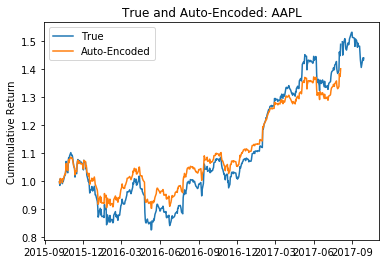

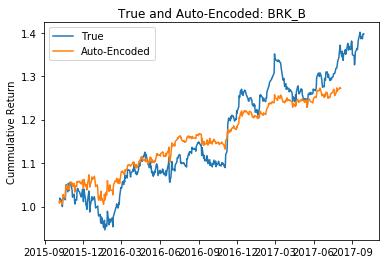

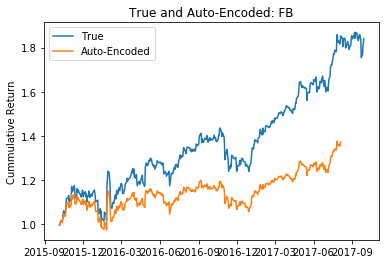

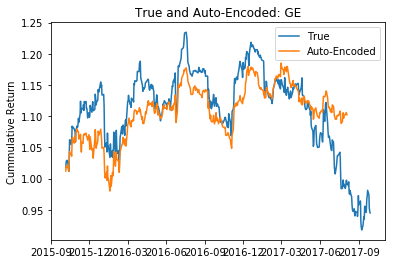

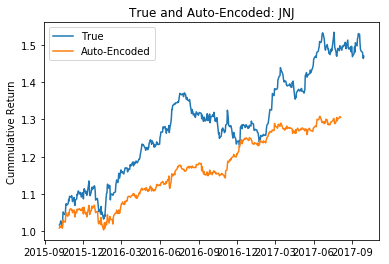

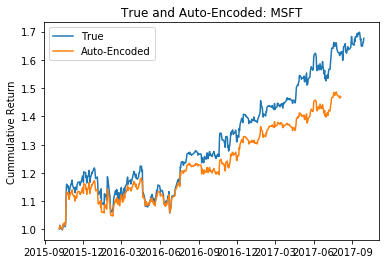

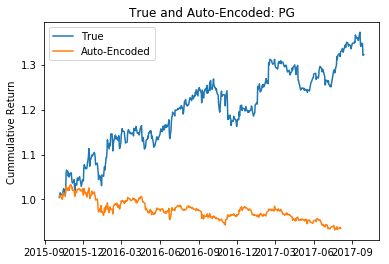

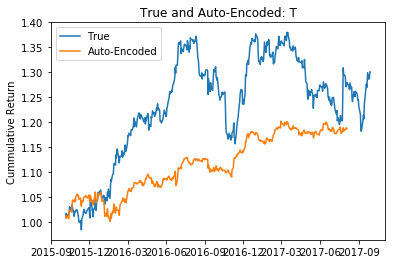

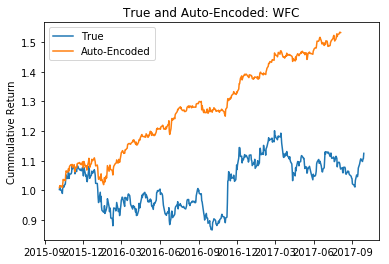

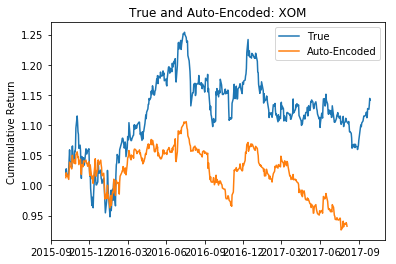

In [53]:

test_stocks = df.index.tolist()
dates = pd.to_datetime(df.columns.tolist()[500:])

for stock in test_stocks:
    plt.figure()
    plt.plot(dates, df_test[stock],dates, df_pred[stock])
    plt.title("True and Auto-Encoded: {}".format(stock))
    plt.legend(['True', 'Auto-Encoded'])
    plt.ylabel("Cummulative Return")


Index(['AAPL', 'BRK_B', 'FB', 'GE', 'JNJ', 'MSFT', 'PG', 'T', 'WFC', 'XOM'], dtype='object', name='Ticker')